***
***
***

# BootCamp em Ciência de Dados 2 - Alura
Márcio Augusto Silva Gonçalves - marcius72@gmail.com - https://github.com/mago72
***
***

## Módulo 1 
Analisando dados da saúde com Python e Pandas
- Aprenda como utilizar Python e Pandas para analisar dados reais.
- Aprenda como ler dados reais com Pandas e os desafios de lidar com dados governamentais.
- Analise e explore os dados criando hipótese de forma analítica.
- Crie visualizações e aprenda boas práticas.
***
***

### <b>Aula 1 - Aquisição e leitura de dados reais

***
### Análise de gastos hospitalares por mês/ano de PROCESSAMENTO e Unidades da Federação(UF) no Brasil: Datasus de jan/2008 a mar/2021
Com TabNet do DATASUS para baixar .CSV em http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi

In [52]:
import pandas as pd
import numpy as np

#### Importando base de dados do SUS utilizando pandas

In [2]:
dados_sus = pd.read_csv('C:/Users/mago7/Documents/Cência de Dados/Curso_Alura/BootCamp/Módulo1/datasus_processamento.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12,
                       thousands='.', decimal=',', engine='python')

#### Exemplo da tabela importada com linhas de R$ gastos por UF e nas colunas em cada mês de jan/2008 até mar/2021

In [3]:
dados_sus.head()

Unidade da Federação     2008/Jan     2008/Fev     2008/Mar     2008/Abr  \
0          11 Rondônia   1388528.39   2931283.42   1541682.52   1525314.96   
1              12 Acre    902416.00   1497206.26   1794028.48   1730469.42   
2          13 Amazonas   4735529.42   7118990.57   8196635.49   8259378.42   
3           14 Roraima    657889.53    777939.31    718688.03    839994.39   
4              15 Pará  18864744.11  19553758.20  21937342.70  20842829.69   

      2008/Mai     2008/Jun     2008/Jul     2008/Ago     2008/Set  ...  \
0   1645953.84   1406150.68   3065279.01   3231494.61   3117178.63  ...   
1   1819443.92   1828496.00   2511754.59   2089107.14   2275708.53  ...   
2   7831399.90   8477273.62   9368858.72   9352532.70   9363099.35  ...   
3    862347.96    832440.66    996693.09    894271.18    910424.17  ...   
4  23249952.88  23240687.56  24002223.56  23341218.03  25172261.32  ...   

      2020/Jul     2020/Ago     2020/Set     2020/Out     2020/Nov  \
0  11824687.13  11733307.76  10201985.14   7955139.45   9357946.29   
1   3915193.20   3640142.82   3391242.21   4044321.44   3276590.10   
2  19769460.14  18059931.43  17841015.63  16408315.10  19895617.91   
3   3015488.30   2826486.18   2928043.91   3090313.73   3621031.05   
4  40804126.43  44385715.88  36820249.47  36965931.34  39004315.80   

      2020/Dez     2021/Jan     2021/Fev     2021/Mar         Total  
0   8880836.55   9266014.59   7730597.04  11023309.47  9.964113e+08  
1   3696997.31   3715723.12   3538427.92   4077045.92  4.500485e+08  
2  17765167.69  21430289.17  25917134.55  22032176.22  1.917248e+09  
3   3454460.94   3266928.47   3519773.73   3985530.08  3.288770e+08  
4  38015145.79  38354682.46  37688314.23  33276392.89  4.705309e+09  

[5 rows x 161 columns]

In [4]:
dados_sus.tail()

Unidade da Federação     2008/Jan     2008/Fev     2008/Mar     2008/Abr  \
22   43 Rio Grande do Sul  30931325.46  57363420.01  51547794.07  56673338.49   
23  50 Mato Grosso do Sul   5377392.11   7002472.61   8423933.19   8797487.68   
24         51 Mato Grosso   4795299.01   8684882.23   7886243.14   8794109.79   
25               52 Goiás  15310637.29  22258668.68  21442515.75  20921212.45   
26    53 Distrito Federal   4745919.19   7632480.67   9647203.26  11098732.99   

       2008/Mai     2008/Jun     2008/Jul     2008/Ago     2008/Set  ...  \
22  48397733.07  52413429.62  56636376.98  56113054.70  55356224.30  ...   
23   9770421.80  10905392.18  10249299.82   9671553.45  10218511.05  ...   
24   9231645.40  10221763.77   9163314.28   9243148.81   9052354.89  ...   
25  21615970.67  18270043.87  20540517.13  20650730.67  20868443.56  ...   
26  12891719.72  12850125.67  12565646.74  13710857.89  13165106.20  ...   

        2020/Jul      2020/Ago      2020/Set      2020/Out      2020/Nov  \
22  1.005793e+08  1.026100e+08  1.044010e+08  1.174583e+08  1.088539e+08   
23  1.885884e+07  1.987708e+07  1.924789e+07  1.949721e+07  2.202313e+07   
24  1.683465e+07  1.970492e+07  2.074623e+07  2.272741e+07  2.050604e+07   
25  4.060622e+07  4.622936e+07  4.488959e+07  4.552950e+07  4.303760e+07   
26  2.526977e+07  2.652620e+07  2.005659e+07  2.085625e+07  2.045933e+07   

        2020/Dez      2021/Jan      2021/Fev      2021/Mar         Total  
22  1.117605e+08  1.199924e+08  1.117974e+08  1.301552e+08  1.276439e+10  
23  1.962959e+07  2.169331e+07  2.433730e+07  2.516820e+07  2.324525e+09  
24  1.958380e+07  1.912014e+07  1.834938e+07  1.961103e+07  2.180120e+09  
25  4.414735e+07  4.612776e+07  4.274277e+07  4.559269e+07  4.973574e+09  
26  2.299157e+07  2.352705e+07  2.276695e+07  3.183192e+07  2.592423e+09  

[5 rows x 161 columns]

In [5]:
dados_sus.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Dez    5.337776e+07
2021/Jan    5.607375e+07
2021/Fev    5.557823e+07
2021/Mar    6.250230e+07
Total       6.388213e+09
Length: 159, dtype: float64

#### Abaixo informação da tabela com identificação de 159 colunas tipo float (valores numéricos decimais) e 2 como object (valores não numéricos). Na sequencia comando para identificar as colunas object.

In [6]:
dados_sus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 161 entries, Unidade da Federação to Total
dtypes: float64(159), object(2)
memory usage: 34.1+ KB


In [7]:
dados_sus.select_dtypes(include=object)

Unidade da Federação      2009/Set
0              11 Rondônia    3605007.43
1                  12 Acre             -
2              13 Amazonas    9730634.16
3               14 Roraima    1701611.25
4                  15 Pará   27967969.22
5                 16 Amapá    2034329.78
6             17 Tocantins    6542918.14
7              21 Maranhão   19722895.51
8                 22 Piauí   12247027.29
9                 23 Ceará   34471579.06
10  24 Rio Grande do Norte   13213817.60
11              25 Paraíba   16117680.24
12           26 Pernambuco   37971068.17
13              27 Alagoas   11170853.09
14              28 Sergipe    6341601.06
15                29 Bahia   53839068.59
16         31 Minas Gerais   96911075.38
17       32 Espírito Santo   15382323.46
18       33 Rio de Janeiro   52027721.77
19            35 São Paulo  220292973.66
20               41 Paraná   65843824.73
21       42 Santa Catarina   37380382.93
22    43 Rio Grande do Sul   66425009.36
23   50 Mato Grosso do Sul   11997775.92
24          51 Mato Grosso   10810420.65
25                52 Goiás   25227845.74
26     53 Distrito Federal   14487053.32

#### Função format para ajuste de notação científica para valores decimais

In [8]:
pd.options.display.float_format='{:.2f}'.format

In [9]:
dados_sus.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Dez     53377763.15
2021/Jan     56073748.02
2021/Fev     55578233.31
2021/Mar     62502301.42
Total      6388213338.48
Length: 159, dtype: float64

#### Avaliando um mês exemplo: agosto de 2008

In [10]:
dados_sus['2008/Ago']

0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [11]:
dados_sus['2008/Ago'].mean()

27800320.306666665

#### Visualizações premilinares
Geração, testes e ajustes de gráficos para o mês agosto de 2008 com plot, pyplot e ticker

<AxesSubplot:xlabel='Unidade da Federação'>

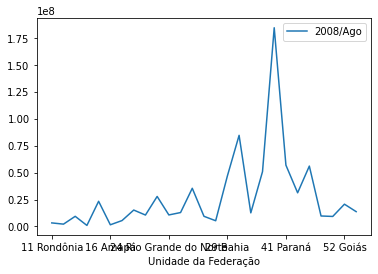

In [12]:
dados_sus.plot(x='Unidade da Federação', y='2008/Ago')

<AxesSubplot:xlabel='Unidade da Federação'>

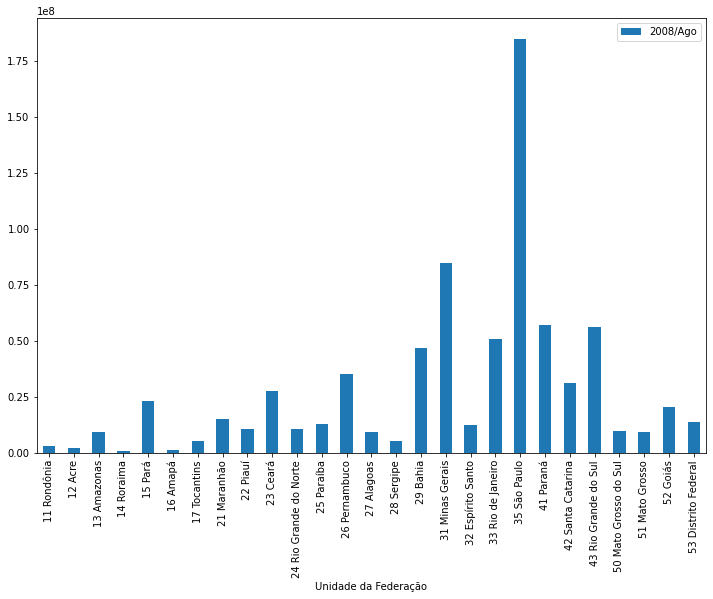

In [13]:
dados_sus.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,8))

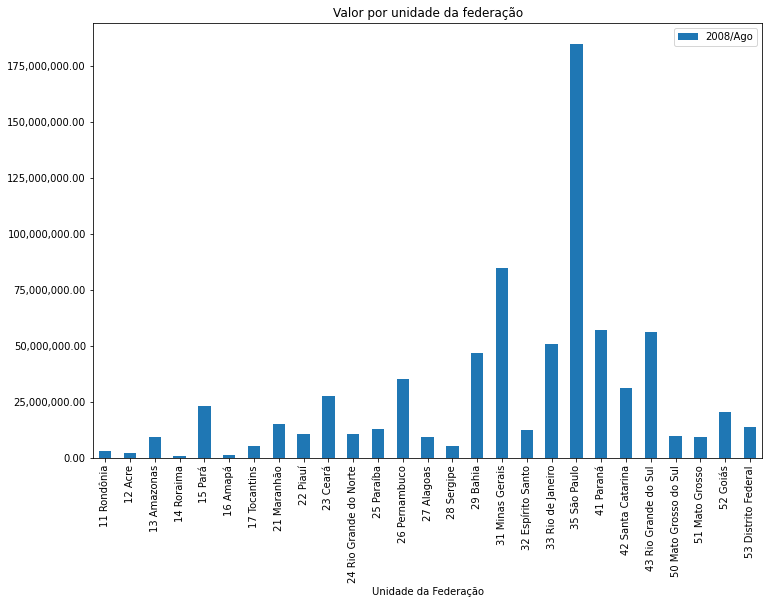

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
ax = dados_sus.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor por unidade da federação')
plt.show()

***

### Desafios - Aula 1 - Módulo 1
***
***

#### Desafio 1 - Aula 1: escolher um título mais descritivo, que passe a  mensagem adequada para o gráfico.

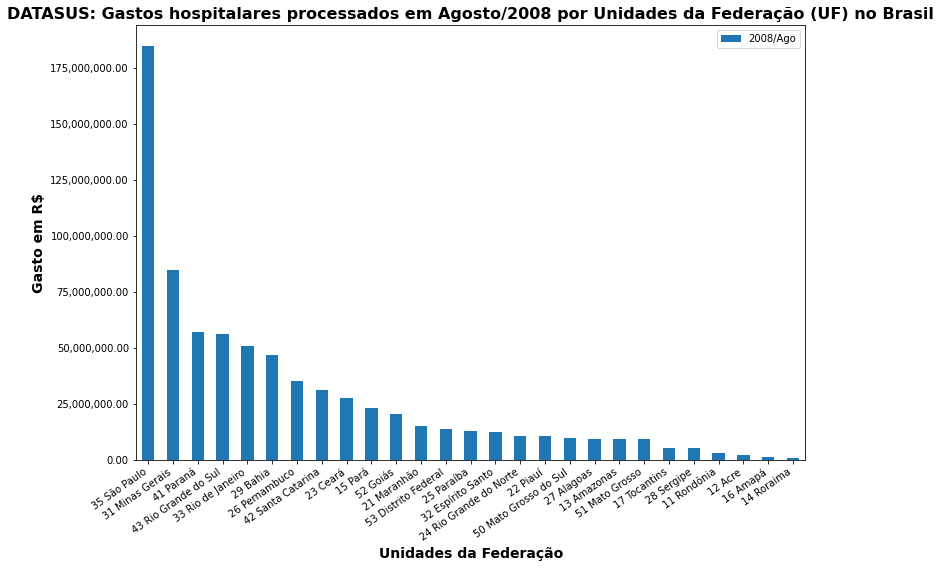

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados_sus.sort_values(by='2008/Ago', ascending=False).plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Unidades da Federação', fontsize=14, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=14, weight=(700))

plt.xticks(rotation=35, ha='right')
plt.title('DATASUS: Gastos hospitalares processados em Agosto/2008 por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

Foram ajustados nomes e negrito do título e rótulo dos eixos, além da posição do rótulo do eixo x e ordem decrescente de gastos por UF


***

#### Desafio 2: faça a mesma análise para o mês mais recente.
***
***

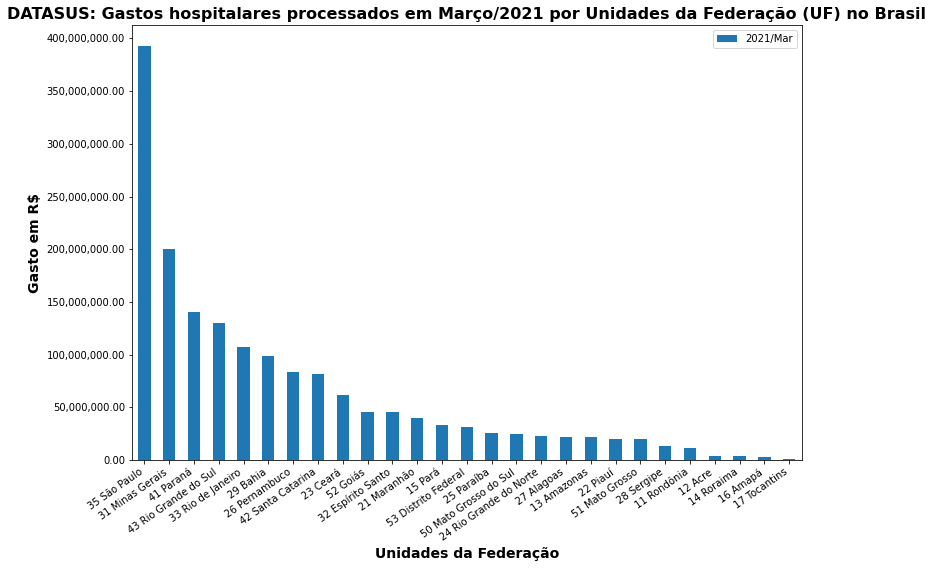

In [16]:
ax = dados_sus.sort_values(by='2021/Mar', ascending=False).plot(x='Unidade da Federação', y='2021/Mar', kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Unidades da Federação', fontsize=14, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=14, weight=(700))

plt.xticks(rotation=35, ha='right')
plt.title('DATASUS: Gastos hospitalares processados em Março/2021 por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

Para melhorias: pode-se tirar os IDs das UFs e colocar o label do eixo y já em milhões, evitando número muito grande

***

### <b>Aula 2 - Primeiras visualizações de dados
Será utilizada uma nova base do DATASUS TabNet agora com data de Internação ao invés da data de processamento da aula1

***

#### Análise de gastos hospitalares por mês/ano de INTERNAÇÃO e Unidades da Federação(UF) no Brasil: Datasus de jan/2008 a mar/2021
Com TabNet do DATASUS para baixar .CSV em http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi

In [17]:
import pandas as pd

#### Importando base de dados do SUS utilizando pandas

In [18]:
dados_sus = pd.read_csv('C:/Users/mago7/Documents/Cência de Dados/Curso_Alura/BootCamp/Módulo1/datasus_internacao.csv', encoding='ISO-8859-1', skiprows=3, sep=';', skipfooter=12,
                       thousands='.', decimal=',', engine='python')

#### Nova tabela importada com linhas de UF com gastos em R$ e nas colunas mês/ano a partir de 1992

In [19]:
dados_sus.head()

Unidade da Federação 1992/Mar 1992/Abr 1993/Mai 1993/Dez 1994/Jan 1994/Fev  \
0          11 Rondônia        -        -        -        -        -        -   
1              12 Acre        -        -        -        -        -        -   
2          13 Amazonas        -        -        -        -        -        -   
3           14 Roraima        -        -        -        -        -        -   
4              15 Pará        -        -        -        -        -        -   

  1994/Mai 1994/Ago 1994/Nov  ...    2020/Jul    2020/Ago    2020/Set  \
0        -        -        -  ... 10479989.36 11433467.56  8876900.39   
1        -        -        -  ...  4053085.41  3658265.59  3470409.45   
2        -        -        -  ... 19303743.16 18687233.58 18628627.49   
3        -        -        -  ...  3192075.41  3262354.34  2978629.22   
4        -        -        -  ... 40496349.97 38793393.54 36965951.76   

     2020/Out    2020/Nov    2020/Dez    2021/Jan    2021/Fev    2021/Mar  \
0  8167253.19  8759013.71  9003402.23  8414690.60  6039419.59  4732441.04   
1  3267918.69  3393958.27  3711660.71  3005561.16  2272733.90  1137341.65   
2 18728251.20 20451573.77 21546059.48 24439059.57 13679358.06  6799060.80   
3  3313296.78  3527263.23  3125021.90  3209323.68  3044798.77  2381844.31   
4 38406616.21 37043032.10 36914437.92 33887773.65 23343222.94 13069564.31   

          Total  
0  996411254.68  
1  450048530.47  
2 1917247936.05  
3  328876965.09  
4 4705309002.29  

[5 rows x 287 columns]

In [20]:
dados_sus.tail()

Unidade da Federação 1992/Mar 1992/Abr 1993/Mai 1993/Dez 1994/Jan  \
22   43 Rio Grande do Sul        -        -        -        -        -   
23  50 Mato Grosso do Sul        -        -        -        -        -   
24         51 Mato Grosso        -        -        -        -        -   
25               52 Goiás        -        -        -        -        -   
26    53 Distrito Federal        -        -        -        -        -   

   1994/Fev 1994/Mai 1994/Ago 1994/Nov  ...     2020/Jul     2020/Ago  \
22        -        -        -        -  ... 108536525.93 111762290.19   
23        -        -        -        -  ...  23639938.85  22608351.55   
24        -        -        -        -  ...  20681571.71  20936140.39   
25        -        -        -        -  ...  45871329.20  47568155.41   
26        -        -        -        -  ...  26428483.82  23875303.68   

       2020/Set     2020/Out     2020/Nov     2020/Dez     2021/Jan  \
22 110107867.30 113886837.47 116738266.69 116833971.73 102317646.36   
23  21519151.07  21825003.22  21418665.16  21387005.58  16027788.65   
24  20176196.43  20387936.40  18316623.02  18852854.81  15890528.31   
25  47951326.80  45304843.74  39785408.90  37614253.55  35655886.73   
26  21771866.33  23087586.62  20668526.36  22552034.04  22573869.50   

      2021/Fev    2021/Mar          Total  
22 84404640.00 37798832.80 12764391179.92  
23 11428462.42  4035989.77  2324525096.33  
24 13207979.82  8835890.09  2180119781.15  
25 32253788.65 24867001.02  4973572261.43  
26 19004029.87 14731938.43  2592422853.56  

[5 rows x 287 columns]

In [21]:
dados_sus.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

#### Abaixo informação da tabela com identificação de 165 colunas tipo float (valores numéricos decimais) e 123 tipo Object (não numéricos). Na sequencia comando para identificar as colunas object.

In [22]:
dados_sus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 287 entries, Unidade da Federação to Total
dtypes: float64(165), object(122)
memory usage: 60.7+ KB


In [23]:
dados_sus.select_dtypes(include=object)

Unidade da Federação  1992/Mar  1992/Abr  1993/Mai  1993/Dez  1994/Jan  \
0              11 Rondônia         -         -         -         -         -   
1                  12 Acre         -         -         -         -         -   
2              13 Amazonas         -         -         -         -         -   
3               14 Roraima         -         -         -         -         -   
4                  15 Pará         -         -         -         -         -   
5                 16 Amapá         -         -         -         -         -   
6             17 Tocantins         -         -         -         -         -   
7              21 Maranhão         -         -         -         -         -   
8                 22 Piauí         -         -         -         -         -   
9                 23 Ceará         -         -         -         -         -   
10  24 Rio Grande do Norte         -         -         -         -         -   
11              25 Paraíba         -         -         -         -         -   
12           26 Pernambuco         -         -         -         -         -   
13              27 Alagoas         -         -         -         -         -   
14              28 Sergipe         -         -         -         -         -   
15                29 Bahia         -         -         -         -         -   
16         31 Minas Gerais         -         -         -         -         -   
17       32 Espírito Santo         -         -         -         -         -   
18       33 Rio de Janeiro         -         -         -         -         -   
19            35 São Paulo  40243.16  11449.99  34583.77  68556.52  39809.34   
20               41 Paraná         -         -         -         -         -   
21       42 Santa Catarina         -         -         -         -         -   
22    43 Rio Grande do Sul         -         -         -         -         -   
23   50 Mato Grosso do Sul         -         -         -         -         -   
24          51 Mato Grosso         -         -         -         -         -   
25                52 Goiás         -         -         -         -         -   
26     53 Distrito Federal         -         -         -         -         -   

    1994/Fev  1994/Mai  1994/Ago  1994/Nov  ... 2006/Out 2006/Nov  2006/Dez  \
0          -         -         -         -  ...        -        -         -   
1          -         -         -         -  ...        -        -         -   
2          -         -         -         -  ...        -        -         -   
3          -         -         -         -  ...        -        -         -   
4          -         -         -         -  ...        -        -         -   
5          -         -         -         -  ...        -        -         -   
6          -         -         -         -  ...        -        -   1122.46   
7          -         -         -         -  ...        -        -         -   
8          -         -         -         -  ...        -        -         -   
9          -         -         -         -  ...        -        -         -   
10         -         -         -         -  ...        -        -         -   
11         -         -         -         -  ...        -        -         -   
12         -         -         -         -  ...        -        -  21520.65   
13         -         -         -         -  ...        -        -         -   
14         -         -         -         -  ...        -        -         -   
15         -         -         -         -  ...        -        -         -   
16         -         -         -         -  ...        -        -         -   
17         -         -         -         -  ...        -        -         -   
18         -         -         -         -  ...        -        -         -   
19  19904.67  19904.67  34532.40  23374.12  ...        -        -   8695.45   
20         -         -         -         -  ...        -   299.17         -   
21         -         -     

#### Função format para ajuste de notação científica para valores decimais

In [24]:
pd.options.display.float_format='{:.2f}'.format

In [25]:
dados_sus.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

#### Avaliando o mês de agosto de 2008

In [26]:
dados_sus['2008/Ago']

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42500830.29
19   180005050.15
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21054991.27
26    11548451.89
Name: 2008/Ago, dtype: float64

In [27]:
dados_sus['2008/Ago'].mean()

26641365.101481482

#### Visualizações preliminares
Geração, testes e ajustes de gráficos para o mês agosto de 2008 com plot, pyplot e ticker

<AxesSubplot:xlabel='Unidade da Federação'>

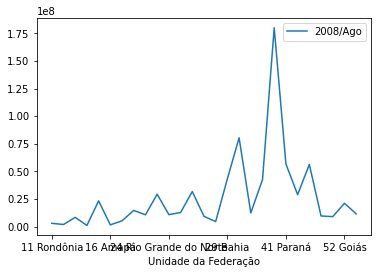

In [28]:
dados_sus.plot(x='Unidade da Federação', y='2008/Ago')

<AxesSubplot:xlabel='Unidade da Federação'>

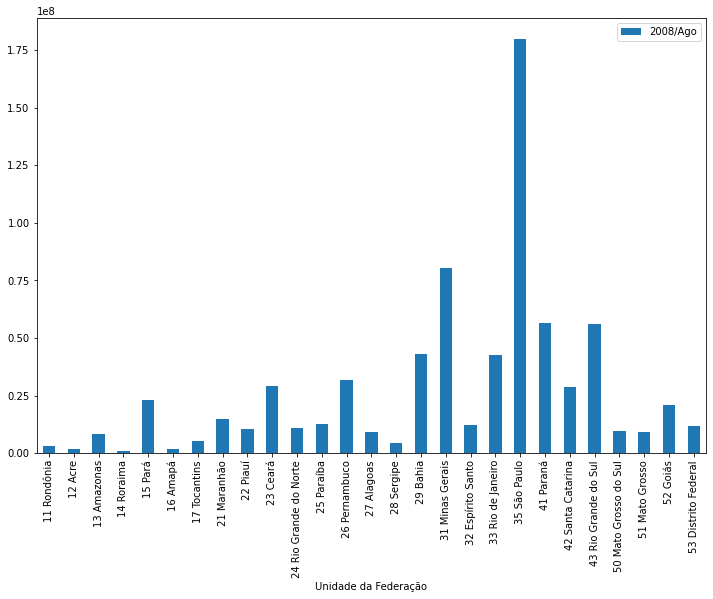

In [29]:
dados_sus.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,8))

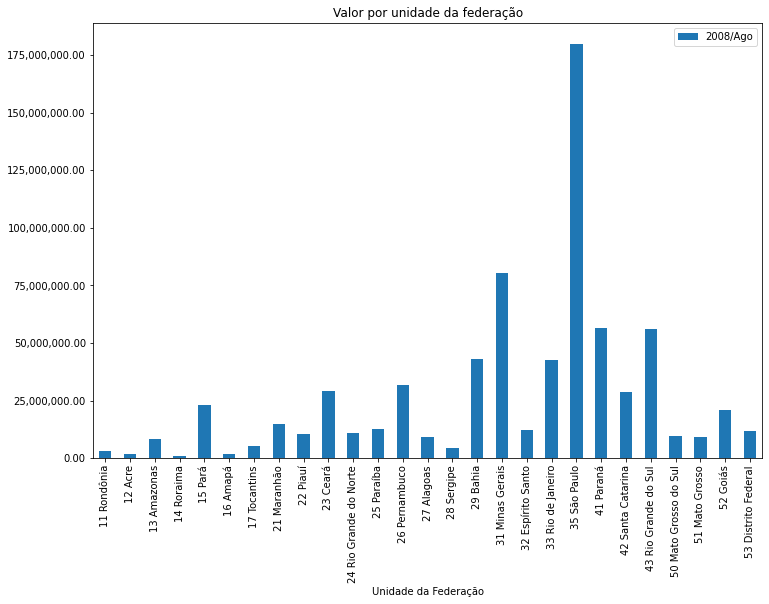

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
ax = dados_sus.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Valor por unidade da federação')
plt.show()

#### Gráfico ajustado abaixo.

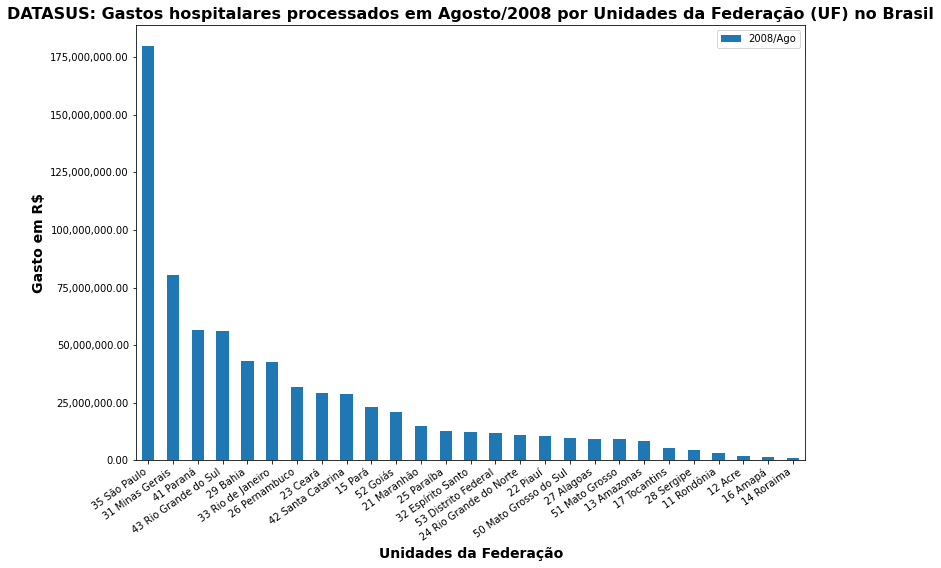

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados_sus.sort_values(by='2008/Ago', ascending=False).plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Unidades da Federação', fontsize=14, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=14, weight=(700))

plt.xticks(rotation=35, ha='right')
plt.title('DATASUS: Gastos hospitalares processados em Agosto/2008 por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

Foram ajustados nomes e negrito do título e rótulo dos eixos, além da posição do rótulo do eixo x e ordem decrescente de gastos por UF

#### Outro gráfico para o mês mais recente do dataframe

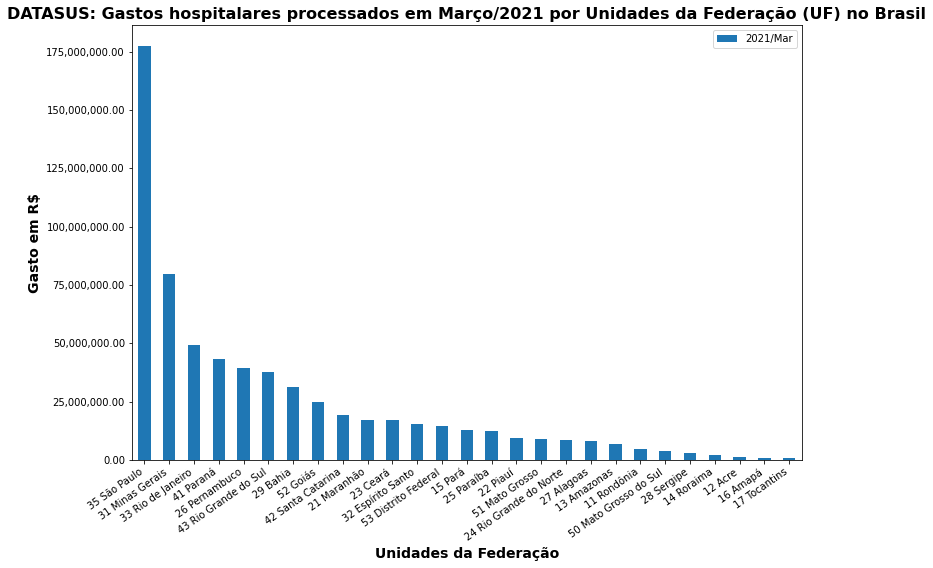

In [32]:
ax = dados_sus.sort_values(by='2021/Mar', ascending=False).plot(x='Unidade da Federação', y='2021/Mar', kind='bar', figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Unidades da Federação', fontsize=14, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=14, weight=(700))

plt.xticks(rotation=35, ha='right')
plt.title('DATASUS: Gastos hospitalares processados em Março/2021 por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

Para melhorias: 1) pode-se tirar os IDs das UFs; 2) colocar o label do eixo y já em milhões, evitando número muito grande; 3) ajustar as casas decimais da média datasus ago/2008

#### Para selecionar duas colunas no novo dataframe

In [33]:
dados_sus[["2008/Ago", "2008/Set"]].head()

2008/Ago    2008/Set
0  2938286.29  2843930.91
1  1886871.84  2084884.80
2  8331763.97  8148089.92
3  1045291.11  1003740.89
4 23259148.28 23667690.01

#### Usando o mean novamente para verificar as colunas com float
veja que valores float válidos começa em jan/2007 indicando as colunas válidas com preenchimento completo e o dataframe começa em 1992 com vários preenchimentos vazios

In [34]:
dados_sus.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

#### Determinando o índice e fazendo um slice no dataframe para colunas válidas

In [35]:
colunas_validas=dados_sus.mean().index
colunas_validas

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
       '2021/Jan', '2021/Fev', '2021/Mar', 'Total'],
      dtype='object', length=165)

In [36]:
dados_sus[colunas_validas]

2007/Ago   2007/Set    2007/Out    2007/Nov    2007/Dez      2008/Jan  \
0     4209.37   16397.03   133645.19   346912.84   711758.31    1829559.71   
1    10470.07   14001.71    86200.85   301323.68   769612.36    1731744.62   
2    35752.72   45570.64   416012.30  2020381.79  5949408.99   11419210.08   
3     4785.91   11858.63    43852.67   369328.51   470676.43     808448.39   
4   181159.29  433414.74  1893197.50  5105406.44 13162823.43   21762104.16   
5    33672.74  104822.98   118378.28   226661.18   844019.90    1329876.61   
6     4113.76   76633.06   343702.61  1068685.94  3022200.87    5136474.61   
7   385330.18 1018352.93  2277717.78  4334468.23  8832514.85   21551600.33   
8   220788.25  353468.67  1078182.68  2406035.32  4929772.93   11375419.37   
9   357904.65  572356.18  1865065.71  5131814.39 10798042.86   32444328.54   
10  134605.36  272088.08   684678.30  1695824.89  4730811.68   11763899.23   
11   97352.78  368130.43  1002088.64  2149873.40  5448177.36   16599004.84   
12  400640.85 1088340.42  2973553.48  6699828.82 16919031.39   51261210.58   
13  104243.75  174024.90   595544.54  1125396.73  2564966.65   16568724.64   
14   27453.63   78565.19   122952.94   775705.52  2765495.63    5439985.99   
15  135146.36  448349.75  1382038.11  3348779.62 11948984.56   73947845.87   
16  971394.37 2861781.50 10018011.35 21730281.63 43429517.54  206208080.90   
17   57408.11  284224.80  1152115.25  2296383.23  5724199.54   16212109.41   
18  469469.34  921646.57  2994664.57  7250528.08 13627123.27  251511992.03   
19 1665349.90 4434168.64 14577395.84 35032259.98 76668547.41 1038067423.15   
20  554800.22 1431708.01  4630402.44 11120030.79 28790722.87   58081334.45   
21  693955.05 1092964.12  3562300.82  7578502.38 14772555.10   53034384.67   
22 1049252.33 3182913.14  8571312.11 16592432.80 30134255.70   51064610.03   
23  199556.12  573675.41  1069816.66  1995899.52  4277979.14    8301006.10   
24   63562.50  232444.62   927219.59  1740439.60  5394225.43    8213438.64   
25  179395.82  418053.58  1198730.25  2712117.54  9293914.78   75039013.46   
26  191951.47  769966.25  2165619.56  3813256.48  7121965.42   10561085.46   

       2008/Fev     2008/Mar     2008/Abr     2008/Mai  ...     2020/Jul  \
0    1940792.63   1955721.68   2143353.81   2280382.58  ...  10479989.36   
1    1743978.66   2057439.02   2057829.69   2226577.93  ...   4053085.41   
2    7934652.10   8641517.13   8531576.49   9079902.15  ...  19303743.16   
3     771687.83    876091.18    896952.53   1027288.73  ...   3192075.41   
4   20126081.01  22149375.82  23436682.75  23861080.80  ...  40496349.97   
5    1275063.72   1177745.93   1396371.51   1411520.77  ...   2536642.73   
6    5051932.07   5200151.87   5343714.73   5344487.99  ...   7934629.02   
7   13452263.93  14750895.33  15148647.11  14543679.92  ...  33991348.70   
8    9711680.20  10428191.09  10227943.00  10562148.66  ...  25817440.95   
9   27643304.86  30085370.22  31376221.00  31189904.62  ...  58448488.85   
10   9110108.87  10126626.54  10964234.85  11032871.23  ...  28608103.39   
11  10871589.62  12348758.14  12680965.13  13258411.71  ...  22092553.67   
12  26222079.10  30716361.81  30589332.79  31420089.90  ...  73730927.63   
13   8112220.30   9210505.56  10466691.94   9844096.03  ...  18519350.73   
14   4636850.76   5017838.07   5265951.03   5367094.94  ...  11700344.16   
15  33410124.06  41316672.72  42826993.62  42086263.49  ...  91011171.04   
16  70301089.50  79119005.51  79046322.41  79268070.12  ... 177466638.10   
17  10032886.43  12262049.08  12453466.98  11789786.09  ...  41931102.65   
18  44128159.73  42900847.02  45306499.53  43951349.46  ...  95941141.03   
19 172961999.58 170556696.16 170338163.23 172462057.87  ... 361986896.25   
20  48855046.46  55611791.07  56115135.82  55574831.93  ... 123856640.55   
21  24409572.92  27483480.50  27806641.44  28354279.52  ...  79459229.80   
22  45897704.82  52928695.92  51972416.77  51679350.79  ... 108536525.93

#### Inserindo a coluna Unidades da Federação dentro do DF de Colunas válidas

In [37]:
colunas_validas = dados_sus.mean().index.tolist()   #transformando o índice em lista para poder manipular
colunas_validas.insert(0, "Unidade da Federação") # 0 é a posição onde entra a coluna unidade da federação do DataFrame original
colunas_validas

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [38]:
validas = dados_sus[colunas_validas]
validas.head()

Unidade da Federação  2007/Ago  2007/Set   2007/Out   2007/Nov    2007/Dez  \
0          11 Rondônia   4209.37  16397.03  133645.19  346912.84   711758.31   
1              12 Acre  10470.07  14001.71   86200.85  301323.68   769612.36   
2          13 Amazonas  35752.72  45570.64  416012.30 2020381.79  5949408.99   
3           14 Roraima   4785.91  11858.63   43852.67  369328.51   470676.43   
4              15 Pará 181159.29 433414.74 1893197.50 5105406.44 13162823.43   

     2008/Jan    2008/Fev    2008/Mar    2008/Abr  ...    2020/Jul  \
0  1829559.71  1940792.63  1955721.68  2143353.81  ... 10479989.36   
1  1731744.62  1743978.66  2057439.02  2057829.69  ...  4053085.41   
2 11419210.08  7934652.10  8641517.13  8531576.49  ... 19303743.16   
3   808448.39   771687.83   876091.18   896952.53  ...  3192075.41   
4 21762104.16 20126081.01 22149375.82 23436682.75  ... 40496349.97   

     2020/Ago    2020/Set    2020/Out    2020/Nov    2020/Dez    2021/Jan  \
0 11433467.56  8876900.39  8167253.19  8759013.71  9003402.23  8414690.60   
1  3658265.59  3470409.45  3267918.69  3393958.27  3711660.71  3005561.16   
2 18687233.58 18628627.49 18728251.20 20451573.77 21546059.48 24439059.57   
3  3262354.34  2978629.22  3313296.78  3527263.23  3125021.90  3209323.68   
4 38793393.54 36965951.76 38406616.21 37043032.10 36914437.92 33887773.65   

     2021/Fev    2021/Mar         Total  
0  6039419.59  4732441.04  996411254.68  
1  2272733.90  1137341.65  450048530.47  
2 13679358.06  6799060.80 1917247936.05  
3  3044798.77  2381844.31  328876965.09  
4 23343222.94 13069564.31 4705309002.29  

[5 rows x 166 columns]

Aqui ficou demonstrado a inserção e que o índice do DF são os números 0 1 2 ... (no lado esquerdo dos estados) ao invés de Unidades da Federação.

#### Assim, pode-se setar o índice devido conforme abaixo:

In [39]:
validas = validas.set_index("Unidade da Federação")
validas

2007/Ago   2007/Set    2007/Out    2007/Nov  \
Unidade da Federação                                                   
11 Rondônia               4209.37   16397.03   133645.19   346912.84   
12 Acre                  10470.07   14001.71    86200.85   301323.68   
13 Amazonas              35752.72   45570.64   416012.30  2020381.79   
14 Roraima                4785.91   11858.63    43852.67   369328.51   
15 Pará                 181159.29  433414.74  1893197.50  5105406.44   
16 Amapá                 33672.74  104822.98   118378.28   226661.18   
17 Tocantins              4113.76   76633.06   343702.61  1068685.94   
21 Maranhão             385330.18 1018352.93  2277717.78  4334468.23   
22 Piauí                220788.25  353468.67  1078182.68  2406035.32   
23 Ceará                357904.65  572356.18  1865065.71  5131814.39   
24 Rio Grande do Norte  134605.36  272088.08   684678.30  1695824.89   
25 Paraíba               97352.78  368130.43  1002088.64  2149873.40   
26 Pernambuco           400640.85 1088340.42  2973553.48  6699828.82   
27 Alagoas              104243.75  174024.90   595544.54  1125396.73   
28 Sergipe               27453.63   78565.19   122952.94   775705.52   
29 Bahia                135146.36  448349.75  1382038.11  3348779.62   
31 Minas Gerais         971394.37 2861781.50 10018011.35 21730281.63   
32 Espírito Santo        57408.11  284224.80  1152115.25  2296383.23   
33 Rio de Janeiro       469469.34  921646.57  2994664.57  7250528.08   
35 São Paulo           1665349.90 4434168.64 14577395.84 35032259.98   
41 Paraná               554800.22 1431708.01  4630402.44 11120030.79   
42 Santa Catarina       693955.05 1092964.12  3562300.82  7578502.38   
43 Rio Grande do Sul   1049252.33 3182913.14  8571312.11 16592432.80   
50 Mato Grosso do Sul   199556.12  573675.41  1069816.66  1995899.52   
51 Mato Grosso           63562.50  232444.62   927219.59  1740439.60   
52 Goiás                179395.82  418053.58  1198730.25  2712117.54   
53 Distrito Federal     191951.47  769966.25  2165619.56  3813256.48   

                          2007/Dez      2008/Jan     2008/Fev     2008/Mar  \
Unidade da Federação                                                         
11 Rondônia              711758.31    1829559.71   1940792.63   1955721.68   
12 Acre                  769612.36    1731744.62   1743978.66   2057439.02   
13 Amazonas             5949408.99   11419210.08   7934652.10   8641517.13   
14 Roraima               470676.43     808448.39    771687.83    876091.18   
15 Pará                13162823.43   21762104.16  20126081.01  22149375.82   
16 Amapá                 844019.90    1329876.61   1275063.72   1177745.93   
17 Tocantins            3022200.87    5136474.61   5051932.07   5200151.87   
21 Maranhão             8832514.85   21551600.33  13452263.93  14750895.33   
22 Piauí                4929772.93   11375419.37   9711680.20  10428191.09   
23 Ceará               10798042.86   32444328.54  27643304.86  30085370.22   
24 Rio Grande do Norte  4730811.68   11763899.23   9110108.87  10126626.54   
25 Paraíba              5448177.36   16599004.84  10871589.62  12348758.14   
26 Pernambuco          16919031.39   51261210.58  26222079.10  30716361.81   
27 Alagoas              2564966.65   16568724.64   8112220.30   9210505.56   
28 Sergipe              2765495.63    5439985.99   4636850.76   5017838.07   
29 Bahia               11948984.56   73947845.87  33410124.06  41316672.72   
31 Minas Gerais        43429517.54  206208080.90  70301089.50  79119005.51   
32 Espírito Santo       5724199.54   16212109.41  10032886.43  12262049.08   
33 Rio de Janeiro      13627123.27  251511992.03  44128159.73  42900847.02   
35 São Paulo           76668547.41 1038067423.15 172961999.58 170556696.16   
41 Paraná              28790722.87   58081334.45  48855046.46  55611791.07   
42 Santa Catarina      14772555.10   53034384.67  24409572.92  27483480.50   
43 Rio Grande do Sul   30134255.70   51064610.03  45897704.82  5

In [40]:
validas['2020/Ago'].head()   # resultado da coluna selecionada por UF

Unidade da Federação
11 Rondônia   11433467.56
12 Acre        3658265.59
13 Amazonas   18687233.58
14 Roraima     3262354.34
15 Pará       38793393.54
Name: 2020/Ago, dtype: float64

In [41]:
validas.loc["12 Acre"]   # Resultado da linha selecionada e os valores por data

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Dez     3711660.71
2021/Jan     3005561.16
2021/Fev     2272733.90
2021/Mar     1137341.65
Total      450048530.47
Name: 12 Acre, Length: 165, dtype: float64

#### Visualização gráfica

<AxesSubplot:xlabel='Unidade da Federação'>

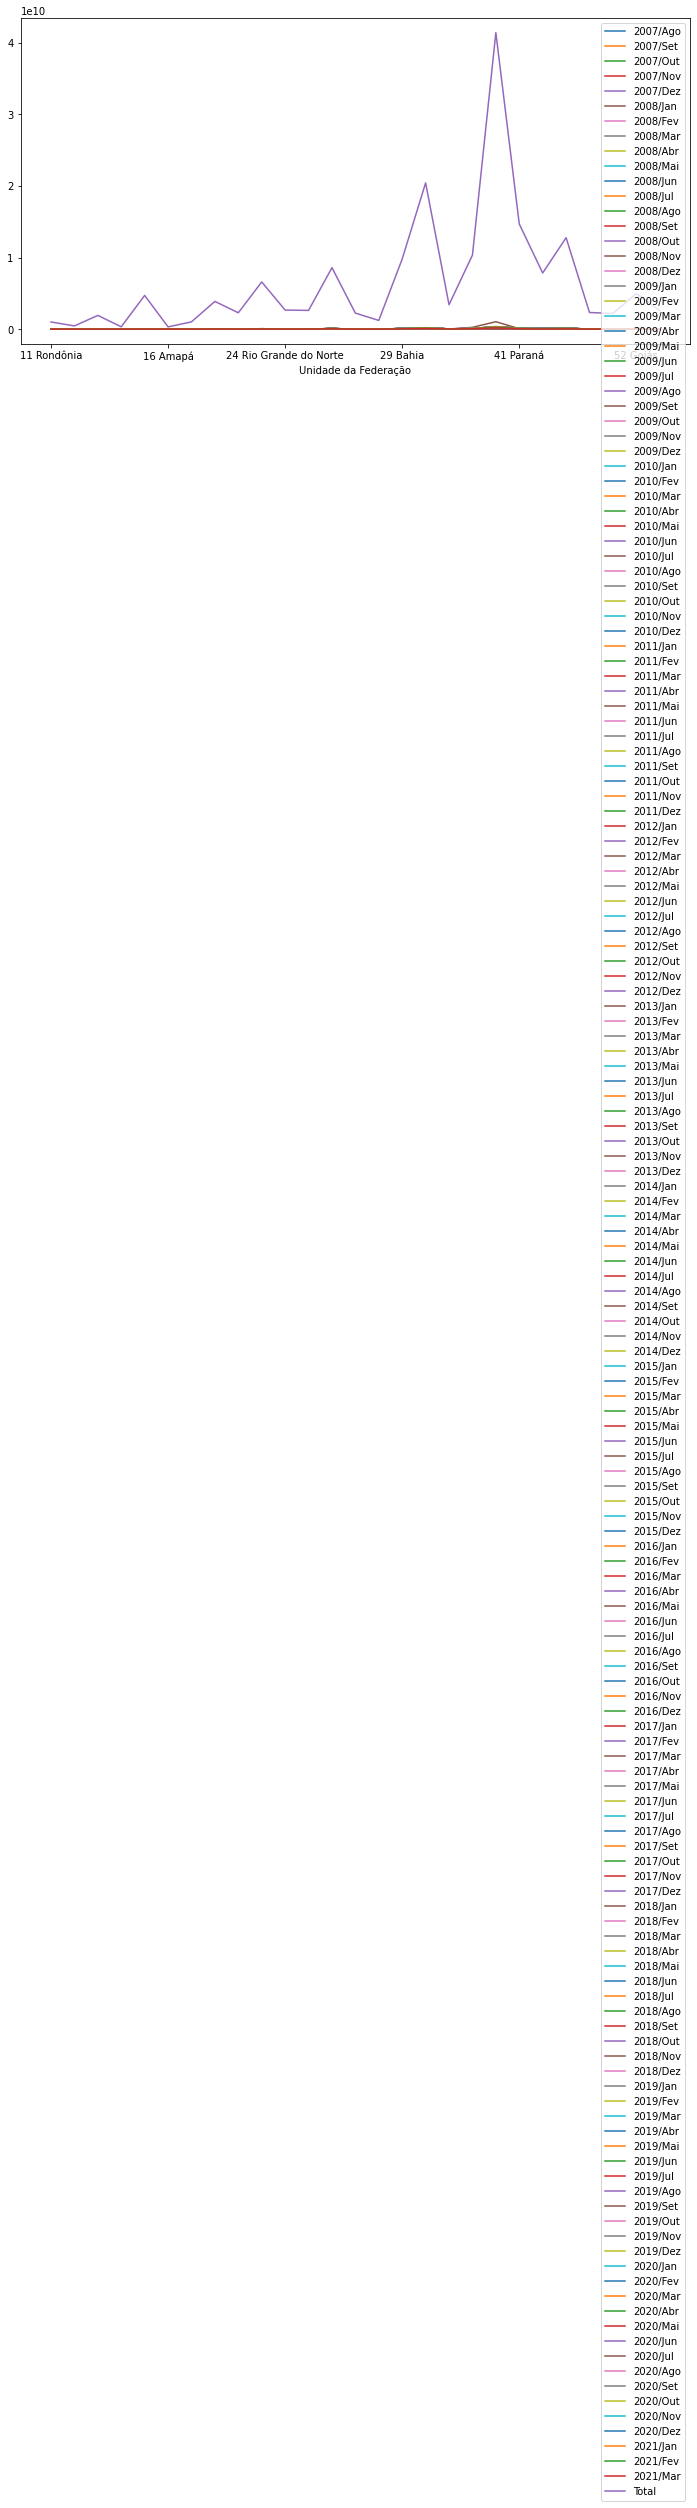

In [42]:
validas.plot(figsize=(12,6))    # Aqui o gráfico fica linhas x datas o que é errado pois deseja-se por UF

#### Aqui vamos transpor o índice, transformando UF para ocupar o DF como colunas e então poder imprimir o gráfico corretamente:

In [43]:
validas.T.head()   # Função T para transpor o índice para as colunas e poder imprimir o gráfico corretamente

Unidade da Federação  11 Rondônia   12 Acre  13 Amazonas  14 Roraima  \
2007/Ago                  4209.37  10470.07     35752.72     4785.91   
2007/Set                 16397.03  14001.71     45570.64    11858.63   
2007/Out                133645.19  86200.85    416012.30    43852.67   
2007/Nov                346912.84 301323.68   2020381.79   369328.51   
2007/Dez                711758.31 769612.36   5949408.99   470676.43   

Unidade da Federação     15 Pará  16 Amapá  17 Tocantins  21 Maranhão  \
2007/Ago               181159.29  33672.74       4113.76    385330.18   
2007/Set               433414.74 104822.98      76633.06   1018352.93   
2007/Out              1893197.50 118378.28     343702.61   2277717.78   
2007/Nov              5105406.44 226661.18    1068685.94   4334468.23   
2007/Dez             13162823.43 844019.90    3022200.87   8832514.85   

Unidade da Federação   22 Piauí    23 Ceará  ...  32 Espírito Santo  \
2007/Ago              220788.25   357904.65  ...           57408.11   
2007/Set              353468.67   572356.18  ...          284224.80   
2007/Out             1078182.68  1865065.71  ...         1152115.25   
2007/Nov             2406035.32  5131814.39  ...         2296383.23   
2007/Dez             4929772.93 10798042.86  ...         5724199.54   

Unidade da Federação  33 Rio de Janeiro  35 São Paulo   41 Paraná  \
2007/Ago                      469469.34    1665349.90   554800.22   
2007/Set                      921646.57    4434168.64  1431708.01   
2007/Out                     2994664.57   14577395.84  4630402.44   
2007/Nov                     7250528.08   35032259.98 11120030.79   
2007/Dez                    13627123.27   76668547.41 28790722.87   

Unidade da Federação  42 Santa Catarina  43 Rio Grande do Sul  \
2007/Ago                      693955.05            1049252.33   
2007/Set                     1092964.12            3182913.14   
2007/Out                     3562300.82            8571312.11   
2007/Nov                     7578502.38           16592432.80   
2007/Dez                    14772555.10           30134255.70   

Unidade da Federação  50 Mato Grosso do Sul  51 Mato Grosso   52 Goiás  \
2007/Ago                          199556.12        63562.50  179395.82   
2007/Set                          573675.41       232444.62  418053.58   
2007/Out                         1069816.66       927219.59 1198730.25   
2007/Nov                         1995899.52      1740439.60 2712117.54   
2007/Dez                         4277979.14      5394225.43 9293914.78   

Unidade da Federação  53 Distrito Federal  
2007/Ago                        191951.47  
2007/Set                        769966.25  
2007/Out                       2165619.56  
2007/Nov                       3813256.48  
2007/Dez                       7121965.42  

[5 rows x 27 columns]

<AxesSubplot:>

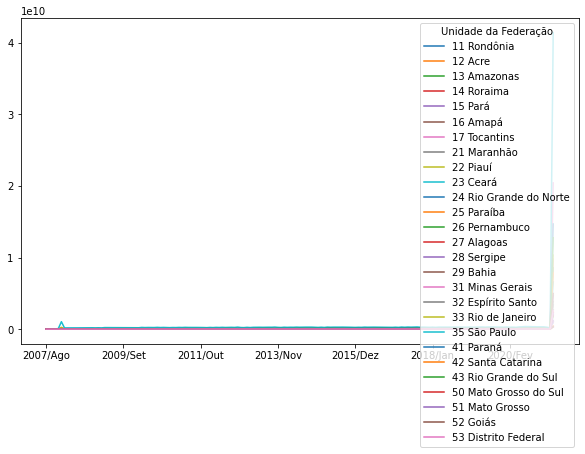

In [44]:
validas.T.plot(figsize=(10,6))

#### O gráfico ficou coorreto por UF, porém o último valor (por trás da legenda) mostra um resultado grande no final 

In [45]:
validas.T.tail()    # Investigando o final do DF de validas transposto revela a coluna 'Total' distorcendo o gráfico

Unidade da Federação  11 Rondônia      12 Acre   13 Amazonas   14 Roraima  \
2020/Dez               9003402.23   3711660.71   21546059.48   3125021.90   
2021/Jan               8414690.60   3005561.16   24439059.57   3209323.68   
2021/Fev               6039419.59   2272733.90   13679358.06   3044798.77   
2021/Mar               4732441.04   1137341.65    6799060.80   2381844.31   
Total                996411254.68 450048530.47 1917247936.05 328876965.09   

Unidade da Federação       15 Pará     16 Amapá  17 Tocantins   21 Maranhão  \
2020/Dez               36914437.92   2826612.42     689383.43   30927070.93   
2021/Jan               33887773.65   2513766.36     347626.85   26797697.76   
2021/Fev               23343222.94   1534733.18     416534.32   23260245.95   
2021/Mar               13069564.31    989155.40     928756.84   17294509.11   
Total                4705309002.29 309860092.59 1020028272.64 3871069498.04   

Unidade da Federação      22 Piauí      23 Ceará  ...  32 Espírito Santo  \
2020/Dez               19352220.14   50271552.33  ...        40500910.57   
2021/Jan               18437275.64   43743425.74  ...        33767261.13   
2021/Fev               13636005.36   30186951.00  ...        25669612.63   
2021/Mar                9542151.53   17173151.55  ...        15606368.11   
Total                2280888802.74 6591836650.18  ...      3405850698.58   

Unidade da Federação  33 Rio de Janeiro   35 São Paulo      41 Paraná  \
2020/Dez                    90567351.87   326846228.95   122146256.92   
2021/Jan                    87201907.99   324115425.70   106948897.53   
2021/Fev                    60873103.08   268193064.06    83130175.37   
2021/Mar                    49149884.48   177408317.71    43480729.07   
Total                    10337389922.09 41396408548.81 14681514706.67   

Unidade da Federação  42 Santa Catarina  43 Rio Grande do Sul  \
2020/Dez                    72720675.11          116833971.73   
2021/Jan                    57281832.19          102317646.36   
2021/Fev                    47429335.91           84404640.00   
2021/Mar                    19375822.56           37798832.80   
Total                     7835011163.40        12764391179.92   

Unidade da Federação  50 Mato Grosso do Sul  51 Mato Grosso      52 Goiás  \
2020/Dez                        21387005.58     18852854.81   37614253.55   
2021/Jan                        16027788.65     15890528.31   35655886.73   
2021/Fev                        11428462.42     13207979.82   32253788.65   
2021/Mar                         4035989.77      8835890.09   24867001.02   
Total                         2324525096.33   2180119781.15 4973572261.43   

Unidade da Federação  53 Distrito Federal  
2020/Dez                      22552034.04  
2021/Jan                      22573869.50  
2021/Fev                      19004029.87  
2021/Mar                      14731938.43  
Total                       2592422853.56  

[5 rows x 27 columns]

#### Retirando a coluna Total (drop) da base validas, verificando e gerando novamente o gráfico:

In [46]:
validas = validas.drop("Total", axis=1)    ## A função drop retira a linha Total e o axis=1 indica que o total está como Linha (axis=0 indicaria como coluna, se fosse o caso) 
validas.head()

2007/Ago  2007/Set   2007/Out   2007/Nov    2007/Dez  \
Unidade da Federação                                                         
11 Rondônia            4209.37  16397.03  133645.19  346912.84   711758.31   
12 Acre               10470.07  14001.71   86200.85  301323.68   769612.36   
13 Amazonas           35752.72  45570.64  416012.30 2020381.79  5949408.99   
14 Roraima             4785.91  11858.63   43852.67  369328.51   470676.43   
15 Pará              181159.29 433414.74 1893197.50 5105406.44 13162823.43   

                        2008/Jan    2008/Fev    2008/Mar    2008/Abr  \
Unidade da Federação                                                   
11 Rondônia           1829559.71  1940792.63  1955721.68  2143353.81   
12 Acre               1731744.62  1743978.66  2057439.02  2057829.69   
13 Amazonas          11419210.08  7934652.10  8641517.13  8531576.49   
14 Roraima             808448.39   771687.83   876091.18   896952.53   
15 Pará              21762104.16 20126081.01 22149375.82 23436682.75   

                        2008/Mai  ...    2020/Jun    2020/Jul    2020/Ago  \
Unidade da Federação              ...                                       
11 Rondônia           2280382.58  ... 10993332.84 10479989.36 11433467.56   
12 Acre               2226577.93  ...  3914823.86  4053085.41  3658265.59   
13 Amazonas           9079902.15  ... 18433057.47 19303743.16 18687233.58   
14 Roraima            1027288.73  ...  3300012.98  3192075.41  3262354.34   
15 Pará              23861080.80  ... 40994545.21 40496349.97 38793393.54   

                        2020/Set    2020/Out    2020/Nov    2020/Dez  \
Unidade da Federação                                                   
11 Rondônia           8876900.39  8167253.19  8759013.71  9003402.23   
12 Acre               3470409.45  3267918.69  3393958.27  3711660.71   
13 Amazonas          18628627.49 18728251.20 20451573.77 21546059.48   
14 Roraima            2978629.22  3313296.78  3527263.23  3125021.90   
15 Pará              36965951.76 38406616.21 37043032.10 36914437.92   

                        2021/Jan    2021/Fev    2021/Mar  
Unidade da Federação                                      
11 Rondônia           8414690.60  6039419.59  4732441.04  
12 Acre               3005561.16  2272733.90  1137341.65  
13 Amazonas          24439059.57 13679358.06  6799060.80  
14 Roraima            3209323.68  3044798.77  2381844.31  
15 Pará              33887773.65 23343222.94 13069564.31  

[5 rows x 164 columns]

In [47]:
validas.T.tail()

Unidade da Federação  11 Rondônia    12 Acre  13 Amazonas  14 Roraima  \
2020/Nov               8759013.71 3393958.27  20451573.77  3527263.23   
2020/Dez               9003402.23 3711660.71  21546059.48  3125021.90   
2021/Jan               8414690.60 3005561.16  24439059.57  3209323.68   
2021/Fev               6039419.59 2272733.90  13679358.06  3044798.77   
2021/Mar               4732441.04 1137341.65   6799060.80  2381844.31   

Unidade da Federação     15 Pará   16 Amapá  17 Tocantins  21 Maranhão  \
2020/Nov             37043032.10 2714710.93     509009.74  32446802.41   
2020/Dez             36914437.92 2826612.42     689383.43  30927070.93   
2021/Jan             33887773.65 2513766.36     347626.85  26797697.76   
2021/Fev             23343222.94 1534733.18     416534.32  23260245.95   
2021/Mar             13069564.31  989155.40     928756.84  17294509.11   

Unidade da Federação    22 Piauí    23 Ceará  ...  32 Espírito Santo  \
2020/Nov             20021998.76 54026288.42  ...        35708727.33   
2020/Dez             19352220.14 50271552.33  ...        40500910.57   
2021/Jan             18437275.64 43743425.74  ...        33767261.13   
2021/Fev             13636005.36 30186951.00  ...        25669612.63   
2021/Mar              9542151.53 17173151.55  ...        15606368.11   

Unidade da Federação  33 Rio de Janeiro  35 São Paulo    41 Paraná  \
2020/Nov                    82807309.85  324599773.40 133443307.36   
2020/Dez                    90567351.87  326846228.95 122146256.92   
2021/Jan                    87201907.99  324115425.70 106948897.53   
2021/Fev                    60873103.08  268193064.06  83130175.37   
2021/Mar                    49149884.48  177408317.71  43480729.07   

Unidade da Federação  42 Santa Catarina  43 Rio Grande do Sul  \
2020/Nov                    79448753.69          116738266.69   
2020/Dez                    72720675.11          116833971.73   
2021/Jan                    57281832.19          102317646.36   
2021/Fev                    47429335.91           84404640.00   
2021/Mar                    19375822.56           37798832.80   

Unidade da Federação  50 Mato Grosso do Sul  51 Mato Grosso    52 Goiás  \
2020/Nov                        21418665.16     18316623.02 39785408.90   
2020/Dez                        21387005.58     18852854.81 37614253.55   
2021/Jan                        16027788.65     15890528.31 35655886.73   
2021/Fev                        11428462.42     13207979.82 32253788.65   
2021/Mar                         4035989.77      8835890.09 24867001.02   

Unidade da Federação  53 Distrito Federal  
2020/Nov                      20668526.36  
2020/Dez                      22552034.04  
2021/Jan                      22573869.50  
2021/Fev                      19004029.87  
2021/Mar                      14731938.43  

[5 rows x 27 columns]

<AxesSubplot:>

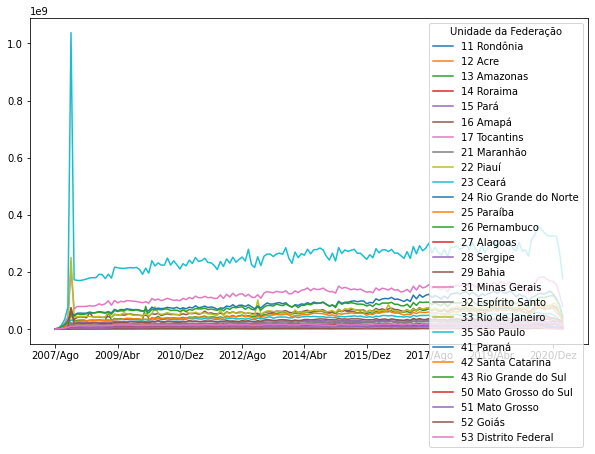

In [48]:
validas.T.plot(figsize=(10,6))

O gráfico ficou ajustado e já indica algo a investigar, posteriormente, nas linhas que sobem muito logo no início do plot dos dados por UF e a legenda mal posicionada (desafio)

### Desafios - Aula 2 - Módulo 1
***
***

#### Desafio 1 - Aula 2: reposicionar a legenda. Dentro? Fora? Onde?

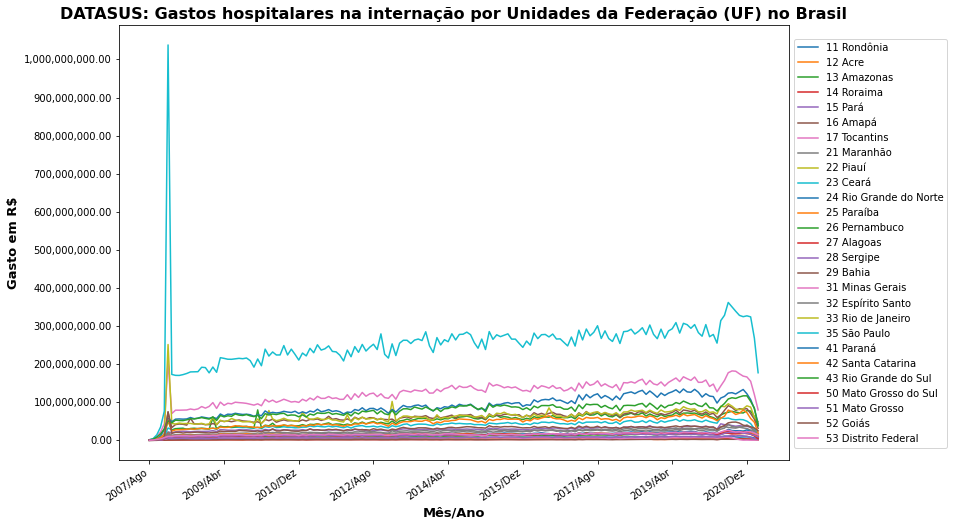

In [49]:
ax = validas.T.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1,0.98))
plt.style.use('ggplot')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=13, weight=(700))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
plt.title('DATASUS: Gastos hospitalares na internação por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

#### Desafio 2 - Aula 2: Plotar o gráfico de linha com apenas 5 estados de sua preferência
***
***

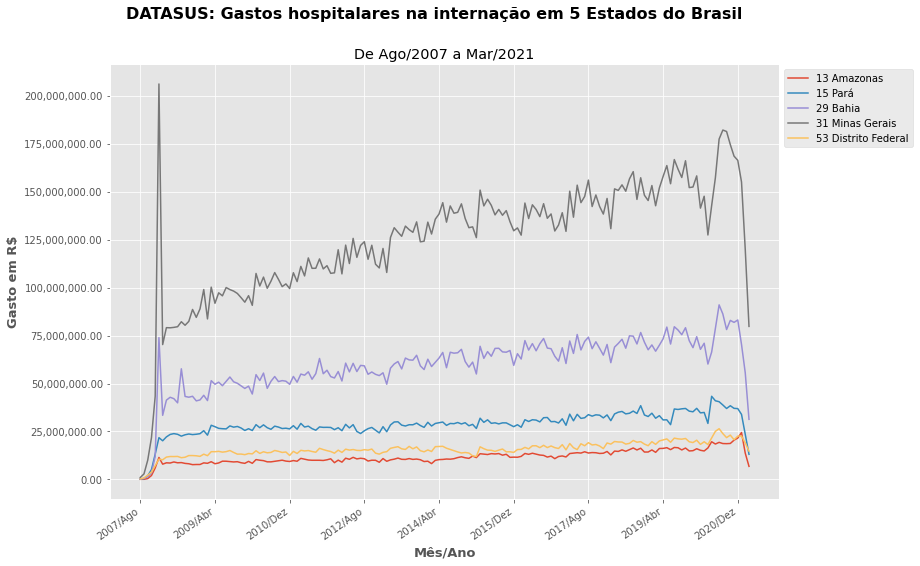

In [50]:
ax = validas.loc[['13 Amazonas', '15 Pará', '29 Bahia', '31 Minas Gerais', '53 Distrito Federal']].T.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1,1))
plt.style.use('ggplot')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=13, weight=(700))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=11)
plt.suptitle('DATASUS: Gastos hospitalares na internação em 5 Estados do Brasil', weight=(700), fontsize=16)
plt.title('De Ago/2007 a Mar/2021')
plt.show()

### <b>Aula 3 - Manipulação de dados
Continuação a partir da base da aula2

- Vimos que nos gráficos acima a paleta de cores respetidas e o início de valores muito altos devem ser investigados
- Ainda que a paleta de cores do matplotlib se repete e não permite a visualização adequada. Um desafio é melhorar a paleta de cores com o matplotlib. Posterioemente será usado a biblioteca SEABORN
- Começamos a Aula 3, portanto, logo com os desafios:
***

### Desafios - Aula 3 - Módulo 1 - <b>1ª parte
***

#### Desafio 01 - Aula 3 : Escolher uma paleta de cores mais adequada do matplotlib.
Vamos começar ajustando as cores do gráfico de gastos hospitalares de todas as 27 UFs

- importar colormap(cm) em matplotlib
- mapa de cores: Paired
- Quantidade de cores: tamando (len) do arranjo do DF validas

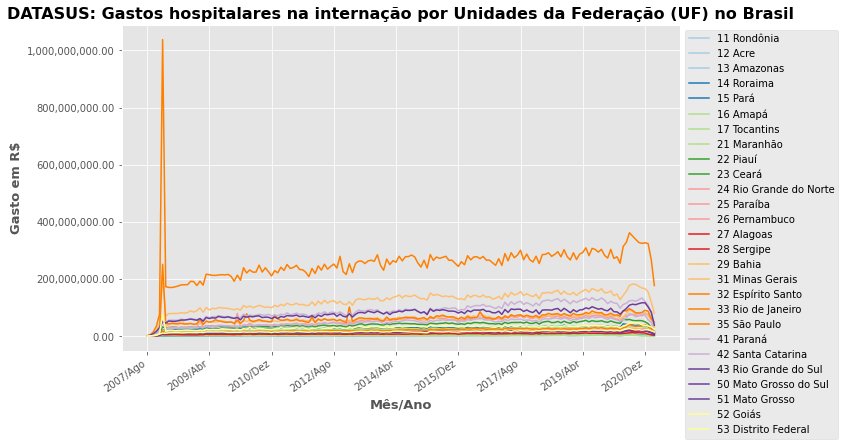

In [53]:
import matplotlib.cm as cm

cores = len(validas)
tipo_cores = plt.cm.Paired(np.linspace(0, 0.9, cores))

ax = validas.T.plot(figsize=(10,6), color=tipo_cores)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=13, weight=(700))

plt.style.use('ggplot') # aqui mesmo mudando o estilo, para que o plt herda o estilo já setado em gráfico anterior neste notebook
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=11)
plt.title('DATASUS: Gastos hospitalares na internação por Unidades da Federação (UF) no Brasil', weight=(700), fontsize=16)
plt.show()

#### Desafio 02 - Aula3: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.
***

In [54]:
validas.head() # Aqui não tem na última coluna as regiões

2007/Ago  2007/Set   2007/Out   2007/Nov    2007/Dez  \
Unidade da Federação                                                         
11 Rondônia            4209.37  16397.03  133645.19  346912.84   711758.31   
12 Acre               10470.07  14001.71   86200.85  301323.68   769612.36   
13 Amazonas           35752.72  45570.64  416012.30 2020381.79  5949408.99   
14 Roraima             4785.91  11858.63   43852.67  369328.51   470676.43   
15 Pará              181159.29 433414.74 1893197.50 5105406.44 13162823.43   

                        2008/Jan    2008/Fev    2008/Mar    2008/Abr  \
Unidade da Federação                                                   
11 Rondônia           1829559.71  1940792.63  1955721.68  2143353.81   
12 Acre               1731744.62  1743978.66  2057439.02  2057829.69   
13 Amazonas          11419210.08  7934652.10  8641517.13  8531576.49   
14 Roraima             808448.39   771687.83   876091.18   896952.53   
15 Pará              21762104.16 20126081.01 22149375.82 23436682.75   

                        2008/Mai  ...    2020/Jun    2020/Jul    2020/Ago  \
Unidade da Federação              ...                                       
11 Rondônia           2280382.58  ... 10993332.84 10479989.36 11433467.56   
12 Acre               2226577.93  ...  3914823.86  4053085.41  3658265.59   
13 Amazonas           9079902.15  ... 18433057.47 19303743.16 18687233.58   
14 Roraima            1027288.73  ...  3300012.98  3192075.41  3262354.34   
15 Pará              23861080.80  ... 40994545.21 40496349.97 38793393.54   

                        2020/Set    2020/Out    2020/Nov    2020/Dez  \
Unidade da Federação                                                   
11 Rondônia           8876900.39  8167253.19  8759013.71  9003402.23   
12 Acre               3470409.45  3267918.69  3393958.27  3711660.71   
13 Amazonas          18628627.49 18728251.20 20451573.77 21546059.48   
14 Roraima            2978629.22  3313296.78  3527263.23  3125021.90   
15 Pará              36965951.76 38406616.21 37043032.10 36914437.92   

                        2021/Jan    2021/Fev    2021/Mar  
Unidade da Federação                                      
11 Rondônia           8414690.60  6039419.59  4732441.04  
12 Acre               3005561.16  2272733.90  1137341.65  
13 Amazonas          24439059.57 13679358.06  6799060.80  
14 Roraima            3209323.68  3044798.77  2381844.31  
15 Pará              33887773.65 23343222.94 13069564.31  

[5 rows x 164 columns]

In [55]:
validas.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [56]:
validas.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

***
Abaixo cria-se uma lista com o nome das Regiões em cada UF, identificando-se pelo index onde na posição 0 o caractere '1' é Norte, o '2' é nordeste, etc...

In [57]:
regiao = validas.T.columns

lst_regioes = []

for pos,char in enumerate(regiao):
    if(char[0] == '1'):
        lst_regioes.append('Norte')
    elif(char[0] == '2'):
        lst_regioes.append('Nordeste')
    elif(char[0] == '3'):
        lst_regioes.append('Sudeste')
    elif(char[0] == '4'):
        lst_regioes.append('Sul')
    elif(char[0] == '5'):
        lst_regioes.append('Centro Oeste')
        
print(lst_regioes)

['Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Norte', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sudeste', 'Sul', 'Sul', 'Sul', 'Centro Oeste', 'Centro Oeste', 'Centro Oeste', 'Centro Oeste']


***
Aqui, acrescentou-se a coluna 'Regiões' contendo a LISTA lst_regioes no DataFrame 'validas'

In [58]:
import pandas as pd
validas['Regiões'] = lst_regioes
validas.head()

2007/Ago  2007/Set   2007/Out   2007/Nov    2007/Dez  \
Unidade da Federação                                                         
11 Rondônia            4209.37  16397.03  133645.19  346912.84   711758.31   
12 Acre               10470.07  14001.71   86200.85  301323.68   769612.36   
13 Amazonas           35752.72  45570.64  416012.30 2020381.79  5949408.99   
14 Roraima             4785.91  11858.63   43852.67  369328.51   470676.43   
15 Pará              181159.29 433414.74 1893197.50 5105406.44 13162823.43   

                        2008/Jan    2008/Fev    2008/Mar    2008/Abr  \
Unidade da Federação                                                   
11 Rondônia           1829559.71  1940792.63  1955721.68  2143353.81   
12 Acre               1731744.62  1743978.66  2057439.02  2057829.69   
13 Amazonas          11419210.08  7934652.10  8641517.13  8531576.49   
14 Roraima             808448.39   771687.83   876091.18   896952.53   
15 Pará              21762104.16 20126081.01 22149375.82 23436682.75   

                        2008/Mai  ...    2020/Jul    2020/Ago    2020/Set  \
Unidade da Federação              ...                                       
11 Rondônia           2280382.58  ... 10479989.36 11433467.56  8876900.39   
12 Acre               2226577.93  ...  4053085.41  3658265.59  3470409.45   
13 Amazonas           9079902.15  ... 19303743.16 18687233.58 18628627.49   
14 Roraima            1027288.73  ...  3192075.41  3262354.34  2978629.22   
15 Pará              23861080.80  ... 40496349.97 38793393.54 36965951.76   

                        2020/Out    2020/Nov    2020/Dez    2021/Jan  \
Unidade da Federação                                                   
11 Rondônia           8167253.19  8759013.71  9003402.23  8414690.60   
12 Acre               3267918.69  3393958.27  3711660.71  3005561.16   
13 Amazonas          18728251.20 20451573.77 21546059.48 24439059.57   
14 Roraima            3313296.78  3527263.23  3125021.90  3209323.68   
15 Pará              38406616.21 37043032.10 36914437.92 33887773.65   

                        2021/Fev    2021/Mar  Regiões  
Unidade da Federação                                   
11 Rondônia           6039419.59  4732441.04    Norte  
12 Acre               2272733.90  1137341.65    Norte  
13 Amazonas          13679358.06  6799060.80    Norte  
14 Roraima            3044798.77  2381844.31    Norte  
15 Pará              23343222.94 13069564.31    Norte  

[5 rows x 165 columns]

***

### <b>Aula 3 mod1 - Continuação

#### Agora, antes de continuar, vamos "dropar" - retirar - a coluna 'Regiões', acrescentada no desafio 2 da aula 3 acima, para podermos fazer seleções APENAS numéricas e poder totalizar os valores

In [85]:
validas = validas.drop('Regiões', axis=1)
validas.head()

2007/Ago  2007/Set   2007/Out   2007/Nov    2007/Dez  \
Unidade da Federação                                                         
11 Rondônia            4209.37  16397.03  133645.19  346912.84   711758.31   
12 Acre               10470.07  14001.71   86200.85  301323.68   769612.36   
13 Amazonas           35752.72  45570.64  416012.30 2020381.79  5949408.99   
14 Roraima             4785.91  11858.63   43852.67  369328.51   470676.43   
15 Pará              181159.29 433414.74 1893197.50 5105406.44 13162823.43   

                        2008/Jan    2008/Fev    2008/Mar    2008/Abr  \
Unidade da Federação                                                   
11 Rondônia           1829559.71  1940792.63  1955721.68  2143353.81   
12 Acre               1731744.62  1743978.66  2057439.02  2057829.69   
13 Amazonas          11419210.08  7934652.10  8641517.13  8531576.49   
14 Roraima             808448.39   771687.83   876091.18   896952.53   
15 Pará              21762104.16 20126081.01 22149375.82 23436682.75   

                        2008/Mai  ...    2020/Jun    2020/Jul    2020/Ago  \
Unidade da Federação              ...                                       
11 Rondônia           2280382.58  ... 10993332.84 10479989.36 11433467.56   
12 Acre               2226577.93  ...  3914823.86  4053085.41  3658265.59   
13 Amazonas           9079902.15  ... 18433057.47 19303743.16 18687233.58   
14 Roraima            1027288.73  ...  3300012.98  3192075.41  3262354.34   
15 Pará              23861080.80  ... 40994545.21 40496349.97 38793393.54   

                        2020/Set    2020/Out    2020/Nov    2020/Dez  \
Unidade da Federação                                                   
11 Rondônia           8876900.39  8167253.19  8759013.71  9003402.23   
12 Acre               3470409.45  3267918.69  3393958.27  3711660.71   
13 Amazonas          18628627.49 18728251.20 20451573.77 21546059.48   
14 Roraima            2978629.22  3313296.78  3527263.23  3125021.90   
15 Pará              36965951.76 38406616.21 37043032.10 36914437.92   

                        2021/Jan    2021/Fev    2021/Mar  
Unidade da Federação                                      
11 Rondônia           8414690.60  6039419.59  4732441.04  
12 Acre               3005561.16  2272733.90  1137341.65  
13 Amazonas          24439059.57 13679358.06  6799060.80  
14 Roraima            3209323.68  3044798.77  2381844.31  
15 Pará              33887773.65 23343222.94 13069564.31  

[5 rows x 164 columns]

#### Veremos agora novas formas de selecionar 5 Estados para um Gráfico, como no 2º desafio da aula2, mais acima, agora com critérios definidos:

In [86]:
validas.T.head() # 5 primeiros

Unidade da Federação  11 Rondônia   12 Acre  13 Amazonas  14 Roraima  \
2007/Ago                  4209.37  10470.07     35752.72     4785.91   
2007/Set                 16397.03  14001.71     45570.64    11858.63   
2007/Out                133645.19  86200.85    416012.30    43852.67   
2007/Nov                346912.84 301323.68   2020381.79   369328.51   
2007/Dez                711758.31 769612.36   5949408.99   470676.43   

Unidade da Federação     15 Pará  16 Amapá  17 Tocantins  21 Maranhão  \
2007/Ago               181159.29  33672.74       4113.76    385330.18   
2007/Set               433414.74 104822.98      76633.06   1018352.93   
2007/Out              1893197.50 118378.28     343702.61   2277717.78   
2007/Nov              5105406.44 226661.18    1068685.94   4334468.23   
2007/Dez             13162823.43 844019.90    3022200.87   8832514.85   

Unidade da Federação   22 Piauí    23 Ceará  ...  32 Espírito Santo  \
2007/Ago              220788.25   357904.65  ...           57408.11   
2007/Set              353468.67   572356.18  ...          284224.80   
2007/Out             1078182.68  1865065.71  ...         1152115.25   
2007/Nov             2406035.32  5131814.39  ...         2296383.23   
2007/Dez             4929772.93 10798042.86  ...         5724199.54   

Unidade da Federação  33 Rio de Janeiro  35 São Paulo   41 Paraná  \
2007/Ago                      469469.34    1665349.90   554800.22   
2007/Set                      921646.57    4434168.64  1431708.01   
2007/Out                     2994664.57   14577395.84  4630402.44   
2007/Nov                     7250528.08   35032259.98 11120030.79   
2007/Dez                    13627123.27   76668547.41 28790722.87   

Unidade da Federação  42 Santa Catarina  43 Rio Grande do Sul  \
2007/Ago                      693955.05            1049252.33   
2007/Set                     1092964.12            3182913.14   
2007/Out                     3562300.82            8571312.11   
2007/Nov                     7578502.38           16592432.80   
2007/Dez                    14772555.10           30134255.70   

Unidade da Federação  50 Mato Grosso do Sul  51 Mato Grosso   52 Goiás  \
2007/Ago                          199556.12        63562.50  179395.82   
2007/Set                          573675.41       232444.62  418053.58   
2007/Out                         1069816.66       927219.59 1198730.25   
2007/Nov                         1995899.52      1740439.60 2712117.54   
2007/Dez                         4277979.14      5394225.43 9293914.78   

Unidade da Federação  53 Distrito Federal  
2007/Ago                        191951.47  
2007/Set                        769966.25  
2007/Out                       2165619.56  
2007/Nov                       3813256.48  
2007/Dez                       7121965.42  

[5 rows x 27 columns]

In [87]:
validas.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [88]:
validas.T.columns[2] # é o 3º Estado do índice

'13 Amazonas'

In [89]:
validas.T.columns[0] # é o 1º Estado do índice

'11 Rondônia'

In [90]:
validas.T.columns[2:7] # para 5 quaisquer nas posições indicadas --> Lembrando que neste caso começa no 2º Estado e terminano 6º estado, já que o segundo termo, número 7 é EX-clusivo

Index(['13 Amazonas', '14 Roraima', '15 Pará', '16 Amapá', '17 Tocantins'], dtype='object', name='Unidade da Federação')

In [91]:
validas.T.columns[0:5] # Nesse caso virá os 5 primeiros Estados do Zero ao Quatro - já que o 5 é exclusive. Colocar o Zero é opcional

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [92]:
validas.index # é o mesmo que pedir as colunas com o T (transpor), pq no DF origem (sem o T) o índice original era apenas o contador e foram setados (código acima) para UF e são os Estados; Quando usa o T os Estados viram as colunas. 

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [93]:
validas.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [94]:
validas[:5]

2007/Ago  2007/Set   2007/Out   2007/Nov    2007/Dez  \
Unidade da Federação                                                         
11 Rondônia            4209.37  16397.03  133645.19  346912.84   711758.31   
12 Acre               10470.07  14001.71   86200.85  301323.68   769612.36   
13 Amazonas           35752.72  45570.64  416012.30 2020381.79  5949408.99   
14 Roraima             4785.91  11858.63   43852.67  369328.51   470676.43   
15 Pará              181159.29 433414.74 1893197.50 5105406.44 13162823.43   

                        2008/Jan    2008/Fev    2008/Mar    2008/Abr  \
Unidade da Federação                                                   
11 Rondônia           1829559.71  1940792.63  1955721.68  2143353.81   
12 Acre               1731744.62  1743978.66  2057439.02  2057829.69   
13 Amazonas          11419210.08  7934652.10  8641517.13  8531576.49   
14 Roraima             808448.39   771687.83   876091.18   896952.53   
15 Pará              21762104.16 20126081.01 22149375.82 23436682.75   

                        2008/Mai  ...    2020/Jun    2020/Jul    2020/Ago  \
Unidade da Federação              ...                                       
11 Rondônia           2280382.58  ... 10993332.84 10479989.36 11433467.56   
12 Acre               2226577.93  ...  3914823.86  4053085.41  3658265.59   
13 Amazonas           9079902.15  ... 18433057.47 19303743.16 18687233.58   
14 Roraima            1027288.73  ...  3300012.98  3192075.41  3262354.34   
15 Pará              23861080.80  ... 40994545.21 40496349.97 38793393.54   

                        2020/Set    2020/Out    2020/Nov    2020/Dez  \
Unidade da Federação                                                   
11 Rondônia           8876900.39  8167253.19  8759013.71  9003402.23   
12 Acre               3470409.45  3267918.69  3393958.27  3711660.71   
13 Amazonas          18628627.49 18728251.20 20451573.77 21546059.48   
14 Roraima            2978629.22  3313296.78  3527263.23  3125021.90   
15 Pará              36965951.76 38406616.21 37043032.10 36914437.92   

                        2021/Jan    2021/Fev    2021/Mar  
Unidade da Federação                                      
11 Rondônia           8414690.60  6039419.59  4732441.04  
12 Acre               3005561.16  2272733.90  1137341.65  
13 Amazonas          24439059.57 13679358.06  6799060.80  
14 Roraima            3209323.68  3044798.77  2381844.31  
15 Pará              33887773.65 23343222.94 13069564.31  

[5 rows x 164 columns]

<AxesSubplot:>

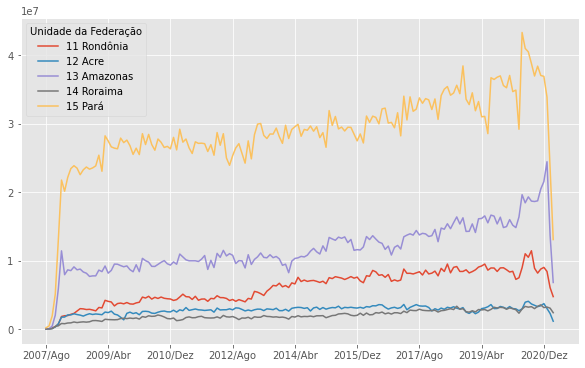

In [95]:
validas[:5].T.plot(figsize=(10,6))

Observando acima, são todos da região Norte. Observando o DataFrame verifica-se que a região Norte começa com o número 1 antes do nome do Estado. Nordeste com 2 e assim por diante

In [96]:
validas.T.columns[0:7] # Aqui verifica-se que a região Norte tem sete Estados. Vamos ajustar o gráfico para todos dessa região

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins'],
      dtype='object', name='Unidade da Federação')

<AxesSubplot:>

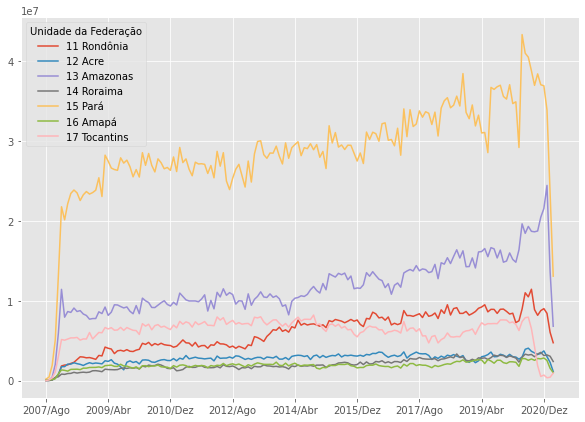

In [97]:
validas[:7].T.plot(figsize=(10,7)) # Verifica-se que por essa região já se pode ter uma visão inicial melhor

#### Agora amostras randomicas dos Estados
Pode deixar só a função 'sample' que já virá aleatoriamente pelo pandas.
Ou importar a lib numpy e usar a função random, que ocorre o mesmo, mas se determinar sempre a mesma sememte (seed) de aleatoriedade, então o random se 'repetirá' pq a semente é a mesma

In [98]:
import numpy as np
np.random.seed(687942)

validas.sample(7)

2007/Ago   2007/Set    2007/Out    2007/Nov  \
Unidade da Federação                                                  
32 Espírito Santo       57408.11  284224.80  1152115.25  2296383.23   
31 Minas Gerais        971394.37 2861781.50 10018011.35 21730281.63   
24 Rio Grande do Norte 134605.36  272088.08   684678.30  1695824.89   
17 Tocantins             4113.76   76633.06   343702.61  1068685.94   
53 Distrito Federal    191951.47  769966.25  2165619.56  3813256.48   
50 Mato Grosso do Sul  199556.12  573675.41  1069816.66  1995899.52   
16 Amapá                33672.74  104822.98   118378.28   226661.18   

                          2007/Dez     2008/Jan    2008/Fev    2008/Mar  \
Unidade da Federação                                                      
32 Espírito Santo       5724199.54  16212109.41 10032886.43 12262049.08   
31 Minas Gerais        43429517.54 206208080.90 70301089.50 79119005.51   
24 Rio Grande do Norte  4730811.68  11763899.23  9110108.87 10126626.54   
17 Tocantins            3022200.87   5136474.61  5051932.07  5200151.87   
53 Distrito Federal     7121965.42  10561085.46 10215956.80 11627918.26   
50 Mato Grosso do Sul   4277979.14   8301006.10  8279288.79  9793888.78   
16 Amapá                 844019.90   1329876.61  1275063.72  1177745.93   

                          2008/Abr    2008/Mai  ...     2020/Jun     2020/Jul  \
Unidade da Federação                            ...                             
32 Espírito Santo      12453466.98 11789786.09  ...  31958199.08  41931102.65   
31 Minas Gerais        79046322.41 79268070.12  ... 157276616.50 177466638.10   
24 Rio Grande do Norte 10964234.85 11032871.23  ...  23027750.86  28608103.39   
17 Tocantins            5343714.73  5344487.99  ...   7871556.55   7934629.02   
53 Distrito Federal    11922015.36 11900817.00  ...  25045580.62  26428483.82   
50 Mato Grosso do Sul   8997542.75  9842108.59  ...  19724932.28  23639938.85   
16 Amapá                1396371.51  1411520.77  ...   2735248.12   2536642.73   

                           2020/Ago     2020/Set     2020/Out     2020/Nov  \
Unidade da Federação                                                         
32 Espírito Santo       36405257.36  34491126.71  34800541.67  35708727.33   
31 Minas Gerais        182176122.99 181422500.43 174585638.28 168564708.16   
24 Rio Grande do Norte  25721339.11  25098604.18  25257993.78  24312931.74   
17 Tocantins             6488927.84   4229376.60   1853045.23    509009.74   
53 Distrito Federal     23875303.68  21771866.33  23087586.62  20668526.36   
50 Mato Grosso do Sul   22608351.55  21519151.07  21825003.22  21418665.16   
16 Amapá                 2702550.32   2533445.46   2762003.36   2714710.93   

                           2020/Dez     2021/Jan     2021/Fev    2021/Mar  
Unidade da Federação                                                       
32 Espírito Santo       40500910.57  33767261.13  25669612.63 15606368.11  
31 Minas Gerais        166376967.67 155064483.25 119877417.15 79780838.00  
24 Rio Grande do Norte  27277816.41  23228004.80  18186942.80  8733455.36  
17 Tocantins              689383.43    347626.85    416534.32   928756.84  
53 Distrito Federal     22552034.04  22573869.50  19004029.87 14731938.43  
50 Mato Grosso do Sul   21387005.58  16027788.65  11428462.42  4035989.77  
16 Amapá                 2826612.42   2513766.36   1534733.18   989155.40  

[7 rows x 164 columns]

In [99]:
validas.sample(7)

2007/Ago   2007/Set    2007/Out    2007/Nov  \
Unidade da Federação                                                 
42 Santa Catarina     693955.05 1092964.12  3562300.82  7578502.38   
33 Rio de Janeiro     469469.34  921646.57  2994664.57  7250528.08   
31 Minas Gerais       971394.37 2861781.50 10018011.35 21730281.63   
35 São Paulo         1665349.90 4434168.64 14577395.84 35032259.98   
21 Maranhão           385330.18 1018352.93  2277717.78  4334468.23   
52 Goiás              179395.82  418053.58  1198730.25  2712117.54   
32 Espírito Santo      57408.11  284224.80  1152115.25  2296383.23   

                        2007/Dez      2008/Jan     2008/Fev     2008/Mar  \
Unidade da Federação                                                       
42 Santa Catarina    14772555.10   53034384.67  24409572.92  27483480.50   
33 Rio de Janeiro    13627123.27  251511992.03  44128159.73  42900847.02   
31 Minas Gerais      43429517.54  206208080.90  70301089.50  79119005.51   
35 São Paulo         76668547.41 1038067423.15 172961999.58 170556696.16   
21 Maranhão           8832514.85   21551600.33  13452263.93  14750895.33   
52 Goiás              9293914.78   75039013.46  18149374.27  20992213.03   
32 Espírito Santo     5724199.54   16212109.41  10032886.43  12262049.08   

                         2008/Abr     2008/Mai  ...     2020/Jun     2020/Jul  \
Unidade da Federação                            ...                             
42 Santa Catarina     27806641.44  28354279.52  ...  63114103.11  79459229.80   
33 Rio de Janeiro     45306499.53  43951349.46  ...  88135690.57  95941141.03   
31 Minas Gerais       79046322.41  79268070.12  ... 157276616.50 177466638.10   
35 São Paulo         170338163.23 172462057.87  ... 328293581.02 361986896.25   
21 Maranhão           15148647.11  14543679.92  ...  35894441.09  33991348.70   
52 Goiás              21049477.30  19162546.79  ...  38888207.13  45871329.20   
32 Espírito Santo     12453466.98  11789786.09  ...  31958199.08  41931102.65   

                         2020/Ago     2020/Set     2020/Out     2020/Nov  \
Unidade da Federação                                                       
42 Santa Catarina     75061205.12  67838476.77  70993555.10  79448753.69   
33 Rio de Janeiro     89795469.41  81886688.22  80570244.20  82807309.85   
31 Minas Gerais      182176122.99 181422500.43 174585638.28 168564708.16   
35 São Paulo         350268671.25 338872478.49 328055822.63 324599773.40   
21 Maranhão           32711259.43  31985709.32  34430463.50  32446802.41   
52 Goiás              47568155.41  47951326.80  45304843.74  39785408.90   
32 Espírito Santo     36405257.36  34491126.71  34800541.67  35708727.33   

                         2020/Dez     2021/Jan     2021/Fev     2021/Mar  
Unidade da Federação                                                      
42 Santa Catarina     72720675.11  57281832.19  47429335.91  19375822.56  
33 Rio de Janeiro     90567351.87  87201907.99  60873103.08  49149884.48  
31 Minas Gerais      166376967.67 155064483.25 119877417.15  79780838.00  
35 São Paulo         326846228.95 324115425.70 268193064.06 177408317.71  
21 Maranhão           30927070.93  26797697.76  23260245.95  17294509.11  
52 Goiás              37614253.55  35655886.73  32253788.65  24867001.02  
32 Espírito Santo     40500910.57  33767261.13  25669612.63  15606368.11  

[7 rows x 164 columns]

#### Idéia de como funciona aleatoriedade por Guilherme Alura

pseudo randomness

seed = 6987
random = seed / 10, seed = seed * 2 /3


random ===> 698...... (seed=4658)
random ==> 465 (seed = 310)
random ==> 31

#### Totalizando as linhas dos Estados: acrescentando uma coluna total na tabela

In [100]:
validas.sum() # Aqui, sem especificação, ele soma o valor das colunas

2007/Ago      8233724.90
2007/Set     21279921.98
2007/Out     65884400.02
2007/Nov    148968559.33
2007/Dez    333103304.40
                ...     
2020/Nov   1450857674.98
2020/Dez   1451868546.56
2021/Jan   1335800905.13
2021/Fev   1052795454.22
2021/Mar    652420247.87
Length: 164, dtype: float64

In [101]:
validas.sum(axis=1) # aqui especificou-se que a soma se dará no eixo x - das linhas

Unidade da Federação
11 Rondônia                996410650.35
12 Acre                    450047246.65
13 Amazonas               1917245104.64
14 Roraima                 328876551.40
15 Pará                   4705290466.69
16 Amapá                   309837994.87
17 Tocantins              1019990254.88
21 Maranhão               3871010362.58
22 Piauí                  2280874839.37
23 Ceará                  6591825335.83
24 Rio Grande do Norte    2660065804.91
25 Paraíba                2614895825.09
26 Pernambuco             8580915668.43
27 Alagoas                2236401471.26
28 Sergipe                1215843416.10
29 Bahia                  9791496136.10
31 Minas Gerais          20418205467.78
32 Espírito Santo         3405838975.80
33 Rio de Janeiro        10337229379.18
35 São Paulo             41386533231.31
41 Paraná                14681341476.16
42 Santa Catarina         7834872054.38
43 Rio Grande do Sul     12764274442.95
50 Mato Grosso do Sul     2324515373.43
51 Mato Grosso     

In [102]:
validas['Total'] = validas.sum(axis=1)  ### Aqui atribuiu-se a uma nova coluna 'Total' ao DF especificando os valores dela sendo a soma das linhas . O Total aparece no final a direita. A atribuição por soma funcionou pq tem 27 valores, igual as linhas do data frame e é a soma de cada linha. Se tem alguma linha faltando, não funcionaria.
validas.head()

2007/Ago  2007/Set   2007/Out   2007/Nov    2007/Dez  \
Unidade da Federação                                                         
11 Rondônia            4209.37  16397.03  133645.19  346912.84   711758.31   
12 Acre               10470.07  14001.71   86200.85  301323.68   769612.36   
13 Amazonas           35752.72  45570.64  416012.30 2020381.79  5949408.99   
14 Roraima             4785.91  11858.63   43852.67  369328.51   470676.43   
15 Pará              181159.29 433414.74 1893197.50 5105406.44 13162823.43   

                        2008/Jan    2008/Fev    2008/Mar    2008/Abr  \
Unidade da Federação                                                   
11 Rondônia           1829559.71  1940792.63  1955721.68  2143353.81   
12 Acre               1731744.62  1743978.66  2057439.02  2057829.69   
13 Amazonas          11419210.08  7934652.10  8641517.13  8531576.49   
14 Roraima             808448.39   771687.83   876091.18   896952.53   
15 Pará              21762104.16 20126081.01 22149375.82 23436682.75   

                        2008/Mai  ...    2020/Jul    2020/Ago    2020/Set  \
Unidade da Federação              ...                                       
11 Rondônia           2280382.58  ... 10479989.36 11433467.56  8876900.39   
12 Acre               2226577.93  ...  4053085.41  3658265.59  3470409.45   
13 Amazonas           9079902.15  ... 19303743.16 18687233.58 18628627.49   
14 Roraima            1027288.73  ...  3192075.41  3262354.34  2978629.22   
15 Pará              23861080.80  ... 40496349.97 38793393.54 36965951.76   

                        2020/Out    2020/Nov    2020/Dez    2021/Jan  \
Unidade da Federação                                                   
11 Rondônia           8167253.19  8759013.71  9003402.23  8414690.60   
12 Acre               3267918.69  3393958.27  3711660.71  3005561.16   
13 Amazonas          18728251.20 20451573.77 21546059.48 24439059.57   
14 Roraima            3313296.78  3527263.23  3125021.90  3209323.68   
15 Pará              38406616.21 37043032.10 36914437.92 33887773.65   

                        2021/Fev    2021/Mar         Total  
Unidade da Federação                                        
11 Rondônia           6039419.59  4732441.04  996410650.35  
12 Acre               2272733.90  1137341.65  450047246.65  
13 Amazonas          13679358.06  6799060.80 1917245104.64  
14 Roraima            3044798.77  2381844.31  328876551.40  
15 Pará              23343222.94 13069564.31 4705290466.69  

[5 rows x 165 columns]

#### Agora o objetivo é um gráfico com os 5 Estados com maior valor total
Para isso, e com a coluna Total readicionada, vamos classificar (ordenar) o DataFrame

In [103]:
validas.sort_values('Total', ascending=False) # Em ordem de maior para o menor gasto (se ascending True ou ausente por default então é do menor para o maior)

2007/Ago   2007/Set    2007/Out    2007/Nov  \
Unidade da Federação                                                   
35 São Paulo           1665349.90 4434168.64 14577395.84 35032259.98   
31 Minas Gerais         971394.37 2861781.50 10018011.35 21730281.63   
41 Paraná               554800.22 1431708.01  4630402.44 11120030.79   
43 Rio Grande do Sul   1049252.33 3182913.14  8571312.11 16592432.80   
33 Rio de Janeiro       469469.34  921646.57  2994664.57  7250528.08   
29 Bahia                135146.36  448349.75  1382038.11  3348779.62   
26 Pernambuco           400640.85 1088340.42  2973553.48  6699828.82   
42 Santa Catarina       693955.05 1092964.12  3562300.82  7578502.38   
23 Ceará                357904.65  572356.18  1865065.71  5131814.39   
52 Goiás                179395.82  418053.58  1198730.25  2712117.54   
15 Pará                 181159.29  433414.74  1893197.50  5105406.44   
21 Maranhão             385330.18 1018352.93  2277717.78  4334468.23   
32 Espírito Santo        57408.11  284224.80  1152115.25  2296383.23   
24 Rio Grande do Norte  134605.36  272088.08   684678.30  1695824.89   
25 Paraíba               97352.78  368130.43  1002088.64  2149873.40   
53 Distrito Federal     191951.47  769966.25  2165619.56  3813256.48   
50 Mato Grosso do Sul   199556.12  573675.41  1069816.66  1995899.52   
22 Piauí                220788.25  353468.67  1078182.68  2406035.32   
27 Alagoas              104243.75  174024.90   595544.54  1125396.73   
51 Mato Grosso           63562.50  232444.62   927219.59  1740439.60   
13 Amazonas              35752.72   45570.64   416012.30  2020381.79   
28 Sergipe               27453.63   78565.19   122952.94   775705.52   
17 Tocantins              4113.76   76633.06   343702.61  1068685.94   
11 Rondônia               4209.37   16397.03   133645.19   346912.84   
12 Acre                  10470.07   14001.71    86200.85   301323.68   
14 Roraima                4785.91   11858.63    43852.67   369328.51   
16 Amapá                 33672.74  104822.98   118378.28   226661.18   

                          2007/Dez      2008/Jan     2008/Fev     2008/Mar  \
Unidade da Federação                                                         
35 São Paulo           76668547.41 1038067423.15 172961999.58 170556696.16   
31 Minas Gerais        43429517.54  206208080.90  70301089.50  79119005.51   
41 Paraná              28790722.87   58081334.45  48855046.46  55611791.07   
43 Rio Grande do Sul   30134255.70   51064610.03  45897704.82  52928695.92   
33 Rio de Janeiro      13627123.27  251511992.03  44128159.73  42900847.02   
29 Bahia               11948984.56   73947845.87  33410124.06  41316672.72   
26 Pernambuco          16919031.39   51261210.58  26222079.10  30716361.81   
42 Santa Catarina      14772555.10   53034384.67  24409572.92  27483480.50   
23 Ceará               10798042.86   32444328.54  27643304.86  30085370.22   
52 Goiás                9293914.78   75039013.46  18149374.27  20992213.03   
15 Pará                13162823.43   21762104.16  20126081.01  22149375.82   
21 Maranhão             8832514.85   21551600.33  13452263.93  14750895.33   
32 Espírito Santo       5724199.54   16212109.41  10032886.43  12262049.08   
24 Rio Grande do Norte  4730811.68   11763899.23   9110108.87  10126626.54   
25 Paraíba              5448177.36   16599004.84  10871589.62  12348758.14   
53 Distrito Federal     7121965.42   10561085.46  10215956.80  11627918.26   
50 Mato Grosso do Sul   4277979.14    8301006.10   8279288.79   9793888.78   
22 Piauí                4929772.93   11375419.37   9711680.20  10428191.09   
27 Alagoas              2564966.65   16568724.64   8112220.30   9210505.56   
51 Mato Grosso          5394225.43    8213438.64   7929894.93   9416367.68   
13 Amazonas             5949408.99   11419210.08   7934652.10   8641517.13   
28 Sergipe              2765495.63    5439985.99   4636850.76   5017838.07   
17 Tocantins            3022200.87    5136474.61   5051932.07   

#### Para manter um dataframe ordenando mas sem a coluna Total:

In [104]:
ordenado_por_total = validas.sort_values('Total', ascending=False) 
ordenado_por_total = ordenado_por_total.drop('Total', axis=1)
ordenado_por_total.head()

2007/Ago   2007/Set    2007/Out    2007/Nov  \
Unidade da Federação                                                 
35 São Paulo         1665349.90 4434168.64 14577395.84 35032259.98   
31 Minas Gerais       971394.37 2861781.50 10018011.35 21730281.63   
41 Paraná             554800.22 1431708.01  4630402.44 11120030.79   
43 Rio Grande do Sul 1049252.33 3182913.14  8571312.11 16592432.80   
33 Rio de Janeiro     469469.34  921646.57  2994664.57  7250528.08   

                        2007/Dez      2008/Jan     2008/Fev     2008/Mar  \
Unidade da Federação                                                       
35 São Paulo         76668547.41 1038067423.15 172961999.58 170556696.16   
31 Minas Gerais      43429517.54  206208080.90  70301089.50  79119005.51   
41 Paraná            28790722.87   58081334.45  48855046.46  55611791.07   
43 Rio Grande do Sul 30134255.70   51064610.03  45897704.82  52928695.92   
33 Rio de Janeiro    13627123.27  251511992.03  44128159.73  42900847.02   

                         2008/Abr     2008/Mai  ...     2020/Jun     2020/Jul  \
Unidade da Federação                            ...                             
35 São Paulo         170338163.23 172462057.87  ... 328293581.02 361986896.25   
31 Minas Gerais       79046322.41  79268070.12  ... 157276616.50 177466638.10   
41 Paraná             56115135.82  55574831.93  ... 115203716.64 123856640.55   
43 Rio Grande do Sul  51972416.77  51679350.79  ...  96799361.58 108536525.93   
33 Rio de Janeiro     45306499.53  43951349.46  ...  88135690.57  95941141.03   

                         2020/Ago     2020/Set     2020/Out     2020/Nov  \
Unidade da Federação                                                       
35 São Paulo         350268671.25 338872478.49 328055822.63 324599773.40   
31 Minas Gerais      182176122.99 181422500.43 174585638.28 168564708.16   
41 Paraná            125089468.62 121771167.11 127506086.52 133443307.36   
43 Rio Grande do Sul 111762290.19 110107867.30 113886837.47 116738266.69   
33 Rio de Janeiro     89795469.41  81886688.22  80570244.20  82807309.85   

                         2020/Dez     2021/Jan     2021/Fev     2021/Mar  
Unidade da Federação                                                      
35 São Paulo         326846228.95 324115425.70 268193064.06 177408317.71  
31 Minas Gerais      166376967.67 155064483.25 119877417.15  79780838.00  
41 Paraná            122146256.92 106948897.53  83130175.37  43480729.07  
43 Rio Grande do Sul 116833971.73 102317646.36  84404640.00  37798832.80  
33 Rio de Janeiro     90567351.87  87201907.99  60873103.08  49149884.48  

[5 rows x 164 columns]

#### Gráfico com os 5 Estados com maiores gastos
***

<AxesSubplot:>

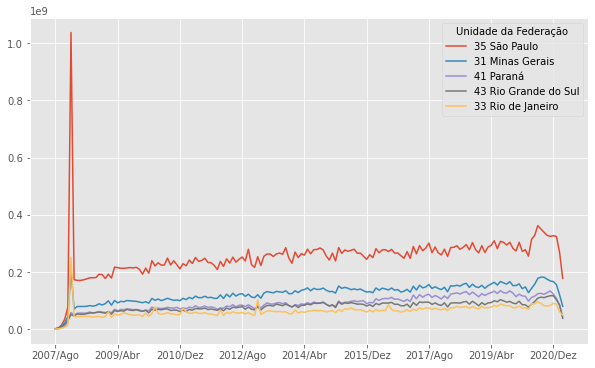

In [105]:
ordenado_por_total.head().T.plot(figsize=(10,6))

***

### Desafios - Aula 3 - Módulo 1 - <b>2ª parte
***
***

#### Desafio 03 - Aula3: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)
Abaixo uma Função criada por --> @Mumaral para aumentar o número de xticks de String no gráfico

In [106]:
def choose_number_of_str_ticks(approximated_number_of_ticks, df, axis='x'):    # Função criada por @mumaral
    # tick labels must be strings for this function to work properly / # df must be a pandas DataFrame
    pandas_index = df.columns if axis == 'y' else df.index    # indexing df by columns (if axis ='y') or rows (default)
    pandas_index_length = pandas_index.size
    divisor = pandas_index_length // approximated_number_of_ticks    # getting only the integer part with floor division (//)
    ticks = [ item for item in range(pandas_index_length) if item % divisor == 0 ]    # creating list with ticks positions
    labels = [ pandas_index[position] for position in ticks ]    # getting the labels of 'ticks' list items
    return ticks, labels

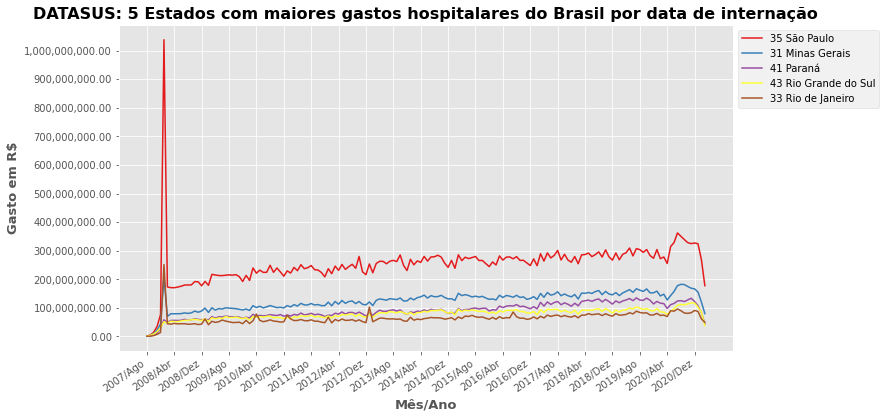

In [107]:
import matplotlib.cm as cm
cores = len(validas)
tipo_cores = plt.cm.Set1(np.linspace(0, 5, cores))
ax = ordenado_por_total.head().T.plot(figsize=(11,6), color=tipo_cores)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=13, weight=(700))
plt.style.use('bmh') 
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
ticks, labels = choose_number_of_str_ticks(20, df=ordenado_por_total.T, axis='x')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.title('DATASUS: 5 Estados com maiores gastos hospitalares do Brasil por data de internação', weight=(700), fontsize=16)
plt.show()

#### Desafio 04 - Aula 3: Adicione o seu estado aos 5 estados plotados anteriormente
(retirar a distorção da escala em virtude do valor anomalo entre ago/2007 e abr/2008)

##### No dataframe ordenado_por_total, chamado acima, notou-se que a coluna Jan/2008 está com valores distorcidos (possível começo do DF pelo SUS)
Será retirado do dataframe essa coluna Jan/2008 que está na posição 5 e todas antes dessa

In [108]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

In [412]:
ordenado_por_total.head()

2008/Fev  2008/Mar  2008/Abr  2008/Mai  2008/Jun  \
Unidade da Federação                                                     
35 São Paulo            172.96    170.56    170.34    172.46    175.49   
31 Minas Gerais          70.30     79.12     79.05     79.27     79.62   
41 Paraná                48.86     55.61     56.12     55.57     56.09   
43 Rio Grande do Sul     45.90     52.93     51.97     51.68     53.76   
33 Rio de Janeiro        44.13     42.90     45.31     43.95     44.11   

                      2008/Jul  2008/Ago  2008/Set  2008/Out  2008/Nov  ...  \
Unidade da Federação                                                    ...   
35 São Paulo            179.57    180.01    180.15    191.86    190.93  ...   
31 Minas Gerais          82.21     80.37     82.41     88.61     84.49  ...   
41 Paraná                59.80     56.70     58.09     61.37     59.67  ...   
43 Rio Grande do Sul     56.39     56.23     57.91     59.59     57.57  ...   
33 Rio de Janeiro        44.36     42.50     43.07     44.55     41.35  ...   

                      2020/Jun  2020/Jul  2020/Ago  2020/Set  2020/Out  \
Unidade da Federação                                                     
35 São Paulo            328.29    361.99    350.27    338.87    328.06   
31 Minas Gerais         157.28    177.47    182.18    181.42    174.59   
41 Paraná               115.20    123.86    125.09    121.77    127.51   
43 Rio Grande do Sul     96.80    108.54    111.76    110.11    113.89   
33 Rio de Janeiro        88.14     95.94     89.80     81.89     80.57   

                      2020/Nov  2020/Dez  2021/Jan  2021/Fev  2021/Mar  
Unidade da Federação                                                    
35 São Paulo            324.60    326.85    324.12    268.19    177.41  
31 Minas Gerais         168.56    166.38    155.06    119.88     79.78  
41 Paraná               133.44    122.15    106.95     83.13     43.48  
43 Rio Grande do Sul    116.74    116.83    102.32     84.40     37.80  
33 Rio de Janeiro        82.81     90.57     87.20     60.87     49.15  

[5 rows x 158 columns]

##### Agora concatenando os 5 estados + o Pará e a Bahia

In [110]:
ordenado_total_head_mais1 = pd.concat([ordenado_por_total.head(), ordenado_por_total.loc[['15 Pará', '29 Bahia']]]) # Concatenando novo dataframe: 5 estados + o Pará

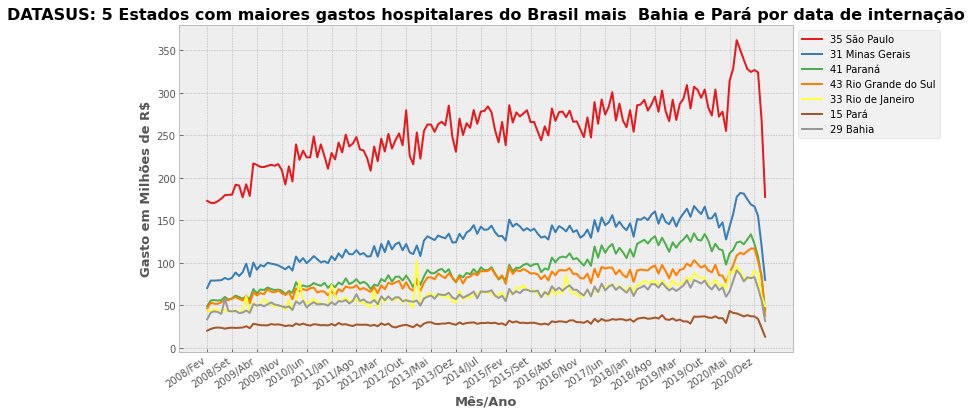

In [111]:
import matplotlib.cm as cm
cores = len(validas)
tipo_cores = plt.cm.Set1(np.linspace(0, 4, cores))
ordenado_total_head_mais1 = ordenado_total_head_mais1 / 1000000
ax = ordenado_total_head_mais1.T.plot(figsize=(11,6), color=tipo_cores)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em Milhões de R$', fontsize=13, weight=(700))
plt.style.use('bmh') 
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
ticks, labels = choose_number_of_str_ticks(20, df=ordenado_por_total.T, axis='x')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.title('DATASUS: 5 Estados com maiores gastos hospitalares do Brasil mais  Bahia e Pará por data de internação', weight=(700), fontsize=16)
plt.show()

#### Desafio 05 Aula 3 : Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas)
e se os picos de alguns estados em fevereiro e verão de modo geral, podem ser reflexo dos casos de dengue

***
Sobre a Base de Dados utilizada e sua viabilidade de análise de gastos e casos de dengue

- Para essa avaliação, precisa-se compreender melhor a origem dos dados do dataframe atual e o que pode formar os seus valores.
A base de dados é do SUS, como vimos, e o sistema TabNet possui [Documentação](http://tabnet.datasus.gov.br/cgi/sih/Proced_hosp_loc_int_2008.pdf) que informa que os dados vem da rede pública ou privada, federal, estadual ou municipal. Ainda, que a base do datasus contem a <i>"identificação do paciente, procedimentos, exames e atos médicos realizados, diagnóstico, 
motivo da alta, valores devidos etc."</i>. Complementando que os atendimentos são: eletivos, de urgência, tipos diversos de acidentes de deslocamento, e  lesões e envenenamentos por agentes químicos ou físicos. Assim, fica evidente que **dentre os gastos hospitalares há uma miríade de motivos e não apenas atendimentos sobre dengue**.  

- Fica claro, portanto, que para avaliar inicialmente a relação de casos de dengues com eventual aumento de gastos no verão ou fevereiro pode-se proceder, a depender da profundidade de análise desejada, de algumas das seguintes formas, dentre outras:
    - a) Apenas com análise da prevalencia sazonal dos casos de dengue de maneira estrita. Supondo que os valores gastos em hospitais aumentam a partir de uma base proporcional. A informação da temporalidade dos casos pode ser encontrada em busca simples de notícias e informes na internet. A vantagem é a comparação direta e a desvantagem é a ausencia de informação do custo por atendimento de pacientes eletivos com dengue.
    - b) Buscar com profundidade a ocorrencia mensal de casos e os valores médio de atendimento/internação por dengue e também pelas outras doenças e casos de traumas, lesões e envenenamentos por outros motivos citados acima. Essa busca pode ser feita no TabNet específico no próprio DataSus com algumas limitações. A vantagem é que poderia ser possível identificar o impacto da sazonalidade de verão ou temporalidade mensal nos gastos hospitalares e comparar com outros motivos de atendimento.

Aqui por se tratar de desafio em treinamento do bootcamp em DataScience da Alura, será feita breve avaliação da foram **a)** acima. De outro modo essa investigação já seria em si um projeto a parte.

**- Sobre a distribuição sazonal de casos**

A partir do [Boletim Epidemiológico 51](https://www.gov.br/saude/pt-br/media/pdf/2020/dezembro/28/boletim_epidemiologico_svs_51.pdf) de dez/2020 do Ministério da Saúde podemos ver de forma clara as curvas de distribuição de casos de dengue concentradas no verão e estendendo-se por todo o primeiro semestre (semana epidemilógica 1 a 26) para os anos de 2019 e 2020:<br>
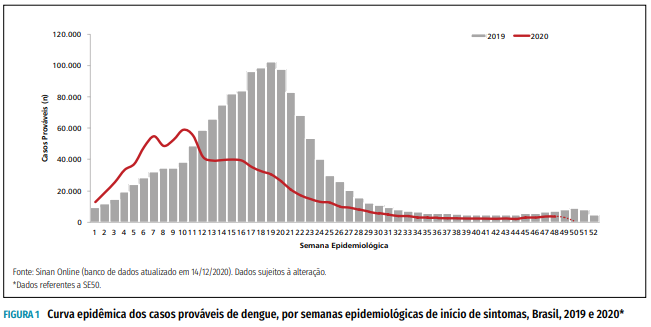<br>
O mesmo pode ser visto para os anos de 2015 a 2017 no [Boletim Epidemiologico 49](http://portalarquivos2.saude.gov.br/images/pdf/2018/janeiro/23/Boletim-2018-001-Dengue.pdf) de dez/2018 do Ministério da Saúde<br>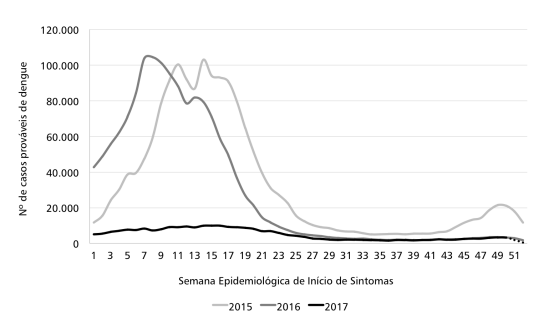<br> Também é possível verificar que o número de casos pode variar bastante de um ano para outro, no caso com 2015 bem menor que os outros anos.
Para uma amostragem mais sistemática dos casos por ano, pode ser utilizado o DataSus no link: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/denguebbr.def .<br> Um gráfico de 2014-2020 do André Jarenkow feito neste BootCamp da Alura (Linkedin: https://www.linkedin.com/in/andre-jarenkow/ ) pode ser visto [aqui](https://media.discordapp.net/attachments/840388857266044949/845009973133836348/unknown.png) <br>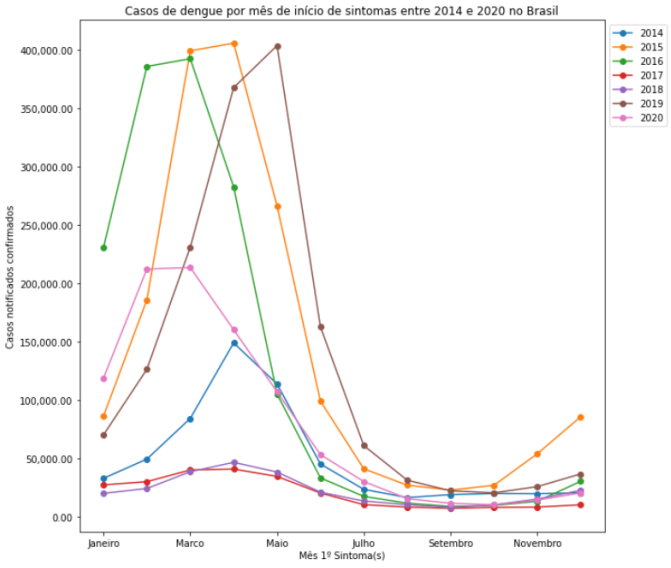

- Sobre a distribuição regional ou estadual de casos

Em ntícias ou boletins não há um comportamento único em relação a curva de casos de dengue. Isso pode variar tanto por fatores ambientais e geográficos de um ano para outro, como ocorrência maior de chuvas, como por fatores comportamentais e locais, como campanhas estaduais ou municipais de combate a focos e ainda gastos de prevenção de focos com água sanitária ou fumacês. Assim pode ser visto em links como o [Brasil de Fato](https://www.brasildefato.com.br/2020/04/16/em-meio-a-pandemia-do-coronavirus-numero-de-casos-de-dengue-no-brasil-cresce-129) a afirmação proporcional ref. a 12ª semana de 2020: <br>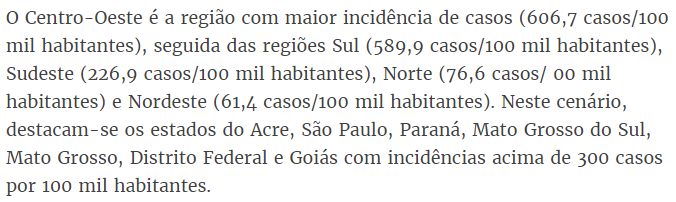<br> Por outro lado a [Veja Saúde](https://saude.abril.com.br/medicina/casos-de-dengue-aumentam-149-no-brasil-quais-os-locais-mais-afetados/) demonstra que no início de 2019 a regionalização das maiores quantidades de casos era outra<br> 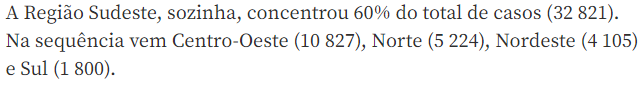<br> A [A folha de São Paulo](https://www1.folha.uol.com.br/cotidiano/2019/09/casos-de-dengue-crescem-599-em-oito-meses-e-ministerio-da-saude-lanca-nova-campanha.shtml) também reporta, com fonte do Min. da Saúde, do ano 2018 para 2019 mudanças regionais quantitativas<br>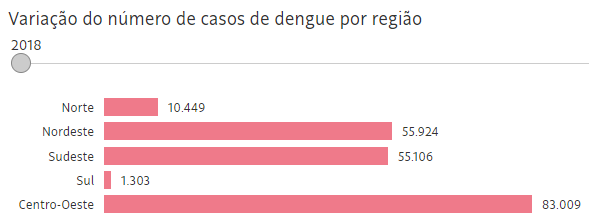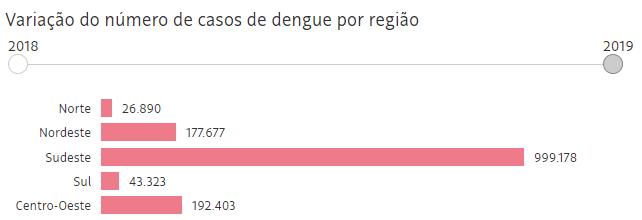<br> Pode ser observado nessa mesma notícia variação por estado por ano:<br>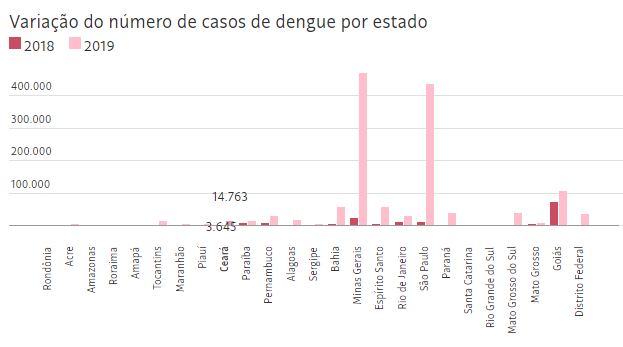 

Vimos assim, que:
- observa-se porporção bem maior de casos de dengue no primeiro semestre de cada ano, não apenas no verão mas indo para o outono.
- Existem variações proporcionais consideráveis gerais de um ano para outro.
- Existem grande variação em uma mesma região ou estado de um ano para outro, que deve ser dependente de fatores ambientais, comportamentais e de políticas públicas.

##### Deve-se esperar portanto um aumento de gastos hospitalares nos estados ou regiões com maior quantidade de casos de dengue no primeiro semestre de cada ano

##### Não é possível saber, todavia, o impacto desse custo no gasto hospitalar total reportado, já que não se tem o valor médio do atendimento/internação de casos de dengue comparado a todo o restante de atendimentos de outras causas realizados.

##### Como recomendação de um projeto, pode-se investigar a prevalencia de casos de dengue em uma população com variações sazonais relacionando-se com a pluviosidade de cada local e ainda a existência de políticas de conscientização e de combate a focos do mosquito transmissor.
***

#### Desafio 06 Aula 3 Mod1: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

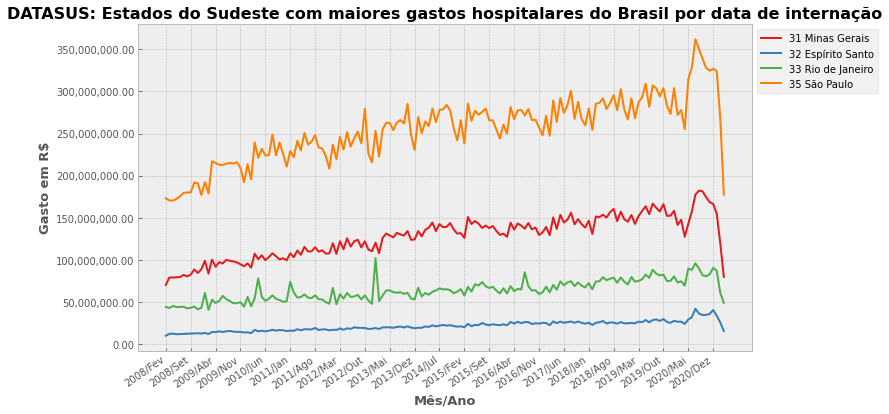

In [112]:
import matplotlib.cm as cm
cores = len(validas)
tipo_cores = plt.cm.Set1(np.linspace(0, 4, cores))
ax = ordenado_por_total.loc[['31 Minas Gerais', '32 Espírito Santo', '33 Rio de Janeiro', '35 São Paulo']].T.plot(figsize=(11,6), color=tipo_cores)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$', fontsize=13, weight=(700))
plt.style.use('bmh') 
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
ticks, labels = choose_number_of_str_ticks(20, df=ordenado_por_total.T, axis='x')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.title('DATASUS: Estados do Sudeste com maiores gastos hospitalares do Brasil por data de internação', weight=(700), fontsize=16)
plt.show()

No gráfico pode-se observar que um pico de gastos no verão 2012/2013 ocorreu apenas nos Estados de São Paulo e Rio de Janeiro, não sendo observado no Espírito Santo ou Minas Gerais. Conforme o desafio 5, podemos agora inferir que esse pico pode estar associado, em alguma proporção NÃO conhecida, a casos de dengue, que tem variação inclusive entre Estados, mas que pode ter a origem a partir de outras questões não relacionadas a dengue.

#### Desafio 07 Aula 3 Mod1: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.
***
***

In [113]:
ordenado_total_head_mais1 = pd.concat([ordenado_por_total.head(), ordenado_por_total.loc[['15 Pará', '29 Bahia']]]) # Concatenando novo dataframe: 5 estados + o Pará e a Bahia

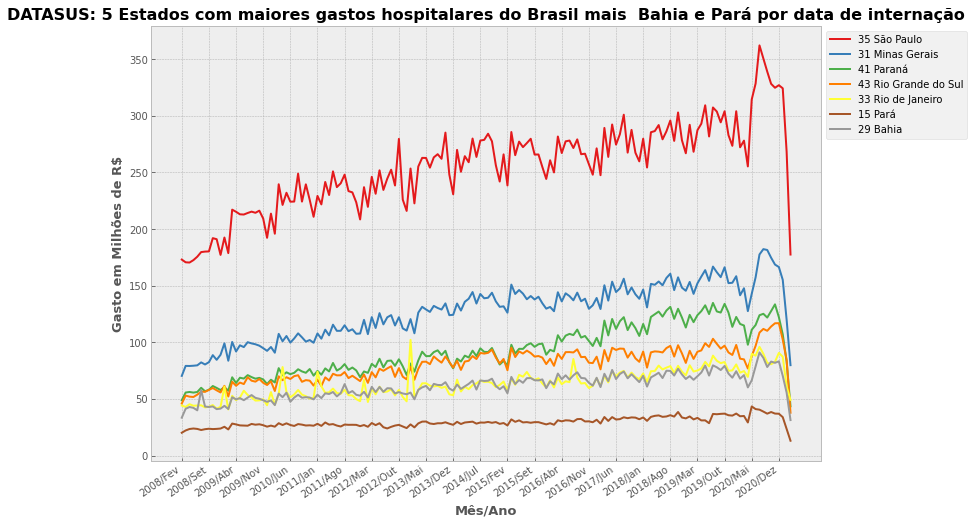

In [114]:
import matplotlib.cm as cm
cores = len(validas)
tipo_cores = plt.cm.Set1(np.linspace(0, 4, cores))
ordenado_total_head_mais1 = ordenado_total_head_mais1 / 1000000
ax = ordenado_total_head_mais1.T.plot(figsize=(12,8), color=tipo_cores)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('Mês/Ano', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em Milhões de R$', fontsize=13, weight=(700))
plt.style.use('bmh') 
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
ticks, labels = choose_number_of_str_ticks(20, df=ordenado_por_total.T, axis='x')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.title('DATASUS: 5 Estados com maiores gastos hospitalares do Brasil mais  Bahia e Pará por data de internação', weight=(700), fontsize=16)
plt.show()

##### Acrescentei junto aos 5 Estados com maiores gastos, o Estado do Pará, onde nasci, e o Estado da Bahia, onde moro.
- Podemos observar que em termos quantitativos a Bahia tem comportamento muito semelhante ao do Rio de Janeiro, com gastos bastante próximos, e o Pará aparentemente a metade dos gastos destes. As populações, conforme último censo geral do IBGE (2010) apontam cerca de 14 milhões de habitantes para a BA, 16 milhões para o RJ e 7,6 milhões para o PA, demonstrando assim aparente proporcionalidade específica de gastos hospitalares.
- Em descompasso com a aparente proporção de gastos pela população, estão o Paraná e o Rio Grande do Sul, pois tem respectivamente 10,4 e 10,7 milhões de habitantes, menos que BA e RJ e com gastos quantitativos maiores. O mesmo aparentemente ocorre com o 2º Estado de maior gasto, Minas Gerais, onde apesar de ter a segunda maior população do Brasil, com 19,6 milhoes de habitantes apresenta cerca do dobro dos gastos de RJ e BA com apenas cerca de 20-25% menos população.
- São Paulo com 41,3 milhões de habitantes é o maior gasto do Brasil e os gastos parecem mais porporcionais com MG, mantendo portanto aparente desporporção populacional com BA, RJ e PA<br>

##### Com essa análise, é recomendável um gráfico comparando com a proporção da população de cada estado
***

### <b>Aula 4 - Mod.1 - Análise de gráficos e criação de hipóteses (fugindo de manipulações)

#### Vamos ver e analisar vários exemplos de práticas duvidosas, que devem ser evitadas, e  que podem sugerir manipulação na visualização e interpretação de gráficos e suas informações

#### Retomando o gráfico com os 5 maiores Estados em gastos hospitalares(deixando o eixo Y em milhões - como feito antes:

<AxesSubplot:>

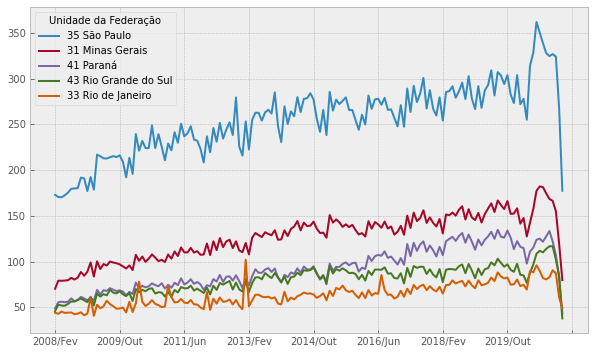

In [115]:
ordenado_por_total = ordenado_por_total / 1000000
ordenado_por_total.head(5).T.plot(figsize=(10,6))

ACIMA: Vejam que no plot automático a escala Y começa depois de zero - em torno de 25 milhões - distorcendo a visualização do gráfico. Por Ex. Paraná parece ser bem menor que São Paulo<br>

#### ABAIXO: deixaremos apenas os 3 maiores Estados e limitaremos o período do eixo x de acordo com o exemplo dado na **VÍDEO-AULA**, evitando a maior parte do período do coronavírus, que em si altera a avaliação, mas não é o objeto nesse momento.

<AxesSubplot:>

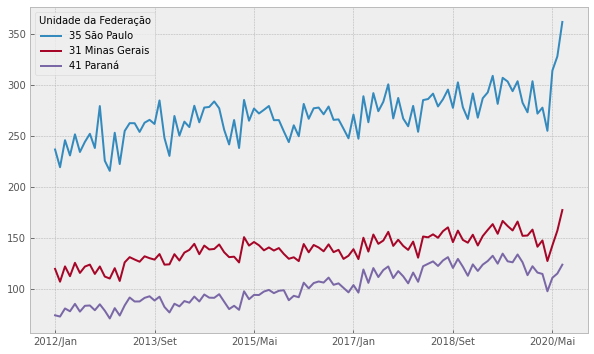

In [116]:
meses_filtrados = ordenado_por_total.columns[47:150]
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10,6))

ACIMA: aqui a visualização da informação ficou pior com distorção da escala Y, que não começou em zero, e a limitação do período do eixo x distorce a aparente tendencia de crescimento (fica menor) dos gastos

#### ABAIXO: usaremos o Ylim para controlar a escala Y começando do zero e demonstrar como a percepção visual já muda

(0.0, 350.0)

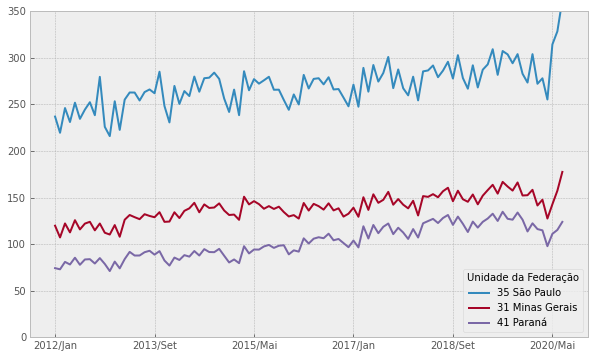

In [117]:
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

#### ABAIXO: com o Ylim a escala Y será distorcida começando de 100, demonstrando má prática com a manipulação da escala, o que pode ocorrer comumente para tentar deixar um produto, por exemplo, mais atrativo. Na área financeira pode ser comum, infelizmente essa prática

(100.0, 350.0)

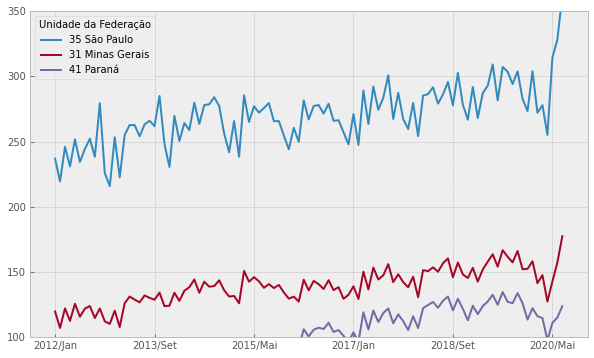

In [118]:
ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(100, 350)

#### ABAIXO: Distorceremos o eixo X limitando mais o período das colunas para **1 ANO** e com isso apagando agora completamente a percepção de aumento da tendência dos gastos. Ficou como se aparentemente não aumentasse, até mesmo caísse um pouco. Se cortasse os últimos meses, ficaria ainda mais evidente.

(0.0, 380.0)

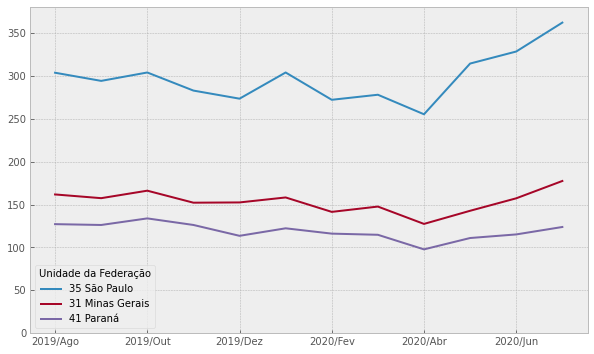

In [119]:
ordenado_por_total[ordenado_por_total.columns[-20:-8]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 380)

#### ABAIXO: O perído será limitado para quase 2 anos - AGO/2010 a MAI/2020 (columns) - dando a entender uma errônea estabilidade dos gastos, quando se compara todo o período do DataFrame

(0.0, 350.0)

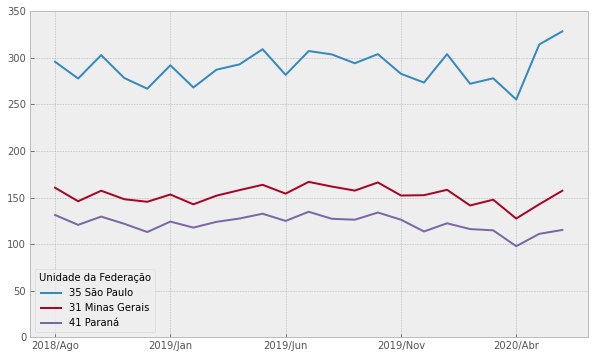

In [120]:
ordenado_por_total[ordenado_por_total.columns[-32:-9]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

#### ABAIXO: Se o eixo X representar 36 meses, muda-se a percepção sobre os gastos, invertendo agora para tendencia de leve aumento.

(0.0, 350.0)

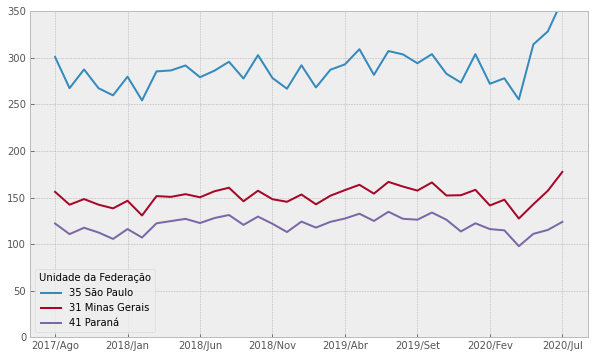

In [121]:
ordenado_por_total[ordenado_por_total.columns[-44:-8]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

#### ABAIXO: Com 60 meses de dados a tendencia de aumento começa a refletir o que todo o DataFrame demonstra. Assim, verificamos que má prática com distorção pode ocorrer também no eixo X. Assim, é mandatório para um cientista de dados olhar os eixos, as escalas e questionar o porque da escolha.

(0.0, 350.0)

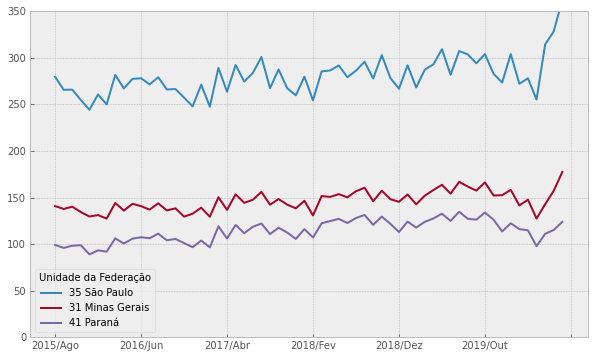

In [122]:
ordenado_por_total[ordenado_por_total.columns[-68:-8]].head(3).T.plot(figsize=(10,6))
plt.ylim(0, 350)

#### ABAIXO, voltamos com os 5 maiores Estados para demonstrar outro exemplo de manipulação ou má prática. O gráfico está com formato que pode ser adequado (10,6), que mostra a tendencia de subida dos gastos em todo o período.

<AxesSubplot:>

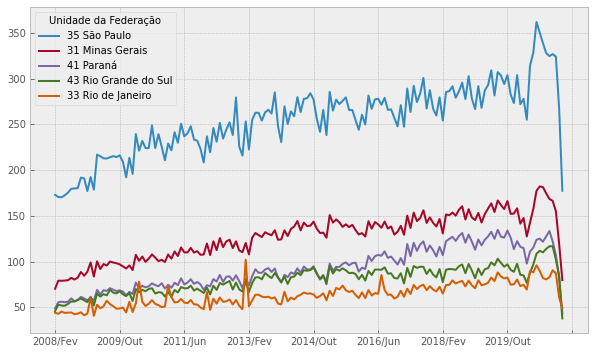

In [123]:
ordenado_por_total.head(5).T.plot(figsize=(10,6))

#### Abaixo, mudamos o formato para 6,6 - quadrado - que por diminuir o tamanho da largura, consequentemente aumenta a aparente inclunação de uma tendencia de subida dos gastos, como se o aumento fosse com ritmo maior do que no gráfico mais largo. Essa prática pode passar a mensagem errada para o consumidor dessa informação. 

<AxesSubplot:>

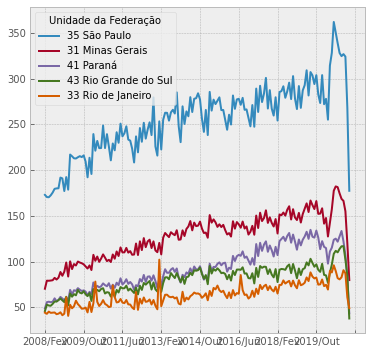

In [124]:
ordenado_por_total.head(5).T.plot(figsize=(6,6))

#### O mesmo ocorre no gráfico ABAIXO, quando aumentamos excessivamente a largura (20,6), dando a impressão oposta de que o aumento da tendencia de subida dos gastos é mais suave. Também podemos considerar uma má prática.
***

<AxesSubplot:>

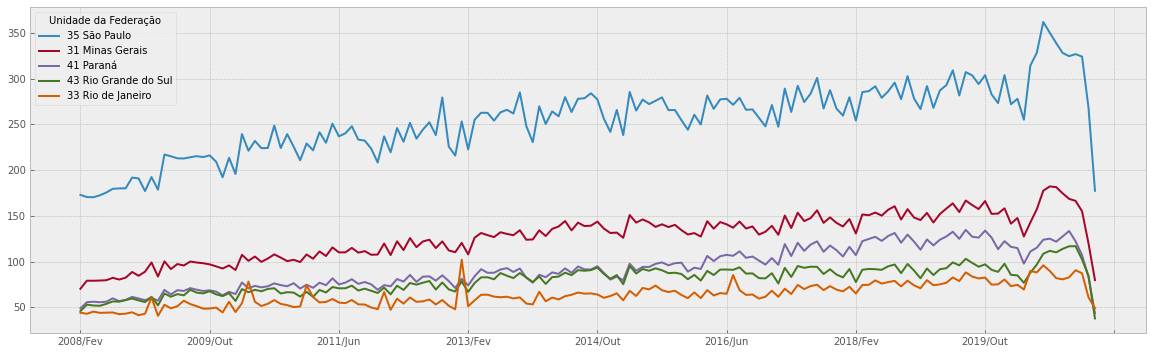

In [125]:
ordenado_por_total.head(5).T.plot(figsize=(20,6))

***

### Desafios - AULA 4 - MOD.1
***
***

#### Desafio 01 - Aula4 : Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações

Os gráficos foram feitos acima e as análises, ao encontro do que foi passado na Vídeo Aula, escritas em markdown antes ou após os gráficos.<br>
Ficou, no entanto, uma necessidade de acrescentar uma **LINHA DE TENDENCIA** para os períodos de 12, 24, 36 e 60 MESES. Para isso, no entanto, o DataFrame deve ser modificado alterando o eixo x de string para int ou date. Não faremos aqui.<br>
Para a linha de tendencia, teríamos que entrar em métodos estatísticos, onde uma REGRESSÃO LINEAR poderia ser feita em python com as Libs: Statsmodels ou o SKLearn

##### ABAIXO: apenas o Estado do Paraná foi plotado

(0.0, 160.0)

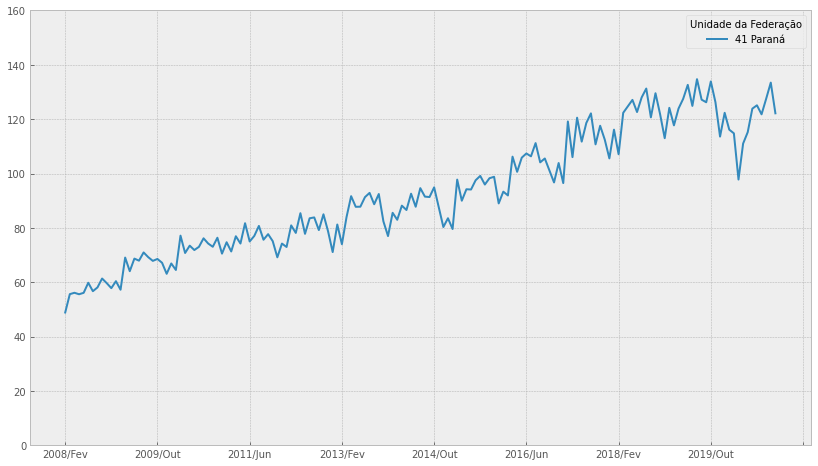

In [126]:
ordenado_por_total[ordenado_por_total.columns[:-3]].loc[['41 Paraná']].T.plot(figsize=(14,8))
plt.ylim(0, 160)

##### Agora será criado um DataFrame para o **_PERÍODO DE Fev/2008 até Dez/2020_** (para evitar distorções de meses recentes ainda sujeitos a alteração de gastos).<br><BR> O DF vem somente com **Gastos do PARANÁ** (float) e nova linha (float) com a **contagem dos meses até 155**, para poder permitir uma regressão entre os valores numéricos, evitando strings.

In [127]:
parana = ordenado_por_total[ordenado_por_total.columns[:-3]].loc[['41 Paraná']]

In [128]:
count = list(range(1,156))

In [129]:
parana = parana.append(pd.Series(count, index = parana.columns[:155]),ignore_index = True)

In [130]:
parana

2008/Fev  2008/Mar  2008/Abr  2008/Mai  2008/Jun  2008/Jul  2008/Ago  \
0     48.86     55.61     56.12     55.57     56.09     59.80     56.70   
1      1.00      2.00      3.00      4.00      5.00      6.00      7.00   

   2008/Set  2008/Out  2008/Nov  ...  2020/Mar  2020/Abr  2020/Mai  2020/Jun  \
0     58.09     61.37     59.67  ...    114.78     97.78    111.01    115.20   
1      8.00      9.00     10.00  ...    146.00    147.00    148.00    149.00   

   2020/Jul  2020/Ago  2020/Set  2020/Out  2020/Nov  2020/Dez  
0    123.86    125.09    121.77    127.51    133.44    122.15  
1    150.00    151.00    152.00    153.00    154.00    155.00  

[2 rows x 155 columns]

In [131]:
parana.T

0      1
2008/Fev  48.86   1.00
2008/Mar  55.61   2.00
2008/Abr  56.12   3.00
2008/Mai  55.57   4.00
2008/Jun  56.09   5.00
...         ...    ...
2020/Ago 125.09 151.00
2020/Set 121.77 152.00
2020/Out 127.51 153.00
2020/Nov 133.44 154.00
2020/Dez 122.15 155.00

[155 rows x 2 columns]

##### AGORA uma Regressão Linear será feita com a Lib STATSMODELS e a linha plotado em Gráfico com o estado do Paraná.

In [132]:
import statsmodels.api as sm
xdat = parana.T[1]
xdat = sm.add_constant(xdat)
ydat = parana.T[0]
model = sm.OLS(ydat,xdat).fit()

Rodando a predição do modelo para obter a TENDENCIA

In [133]:
tend = model.predict()

**ABAIXO gráfico com a série de gastos e a linha de tendencia** mostrando clara tendencia de AUMENTO dos Gastos Hospitalares do Paraná

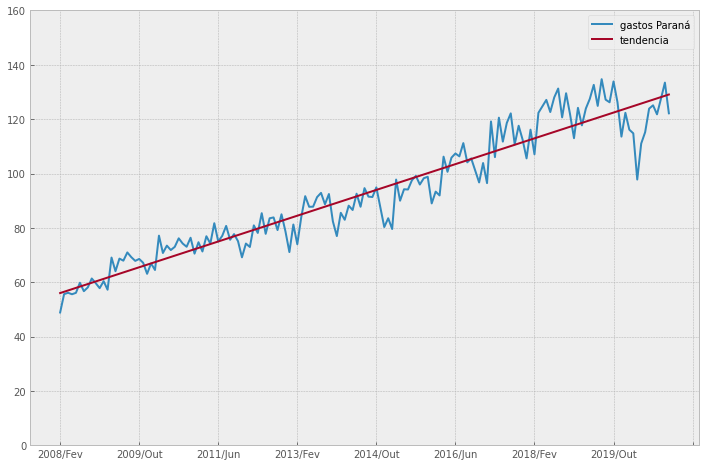

In [134]:
data = pd.DataFrame(index = parana.T.index, data={'gastos Paraná': ydat, 'tendencia': tend})
data.plot(figsize=(12,8)) # add kwargs for title and other layout/design aspects
plt.ylim(0, 160)
plt.show() # or plt.gcf().savefig(path)

ACIMA: Linha de TENDENCIA indicando aumento de gastos no período

##### O mesmo será feito ABAIXO, agora para o **_PERÍODO DE Ago/2019 a Jul/2020_**, representando 12 meses escolhido na vídeo aula para demonstrar a visualização errônea,<br><br> como má prática que distorce a percepção da Tendência. 

In [135]:
count12 = list(range(1,13))

In [136]:
parana12 = parana.append(pd.Series(count12, index = parana.columns[-17:-5]), ignore_index = True)

In [137]:
xdat12 = parana12.T.loc['2019/Ago':'2020/Jul', 2]
xdat12 = sm.add_constant(xdat12)
ydat12 = parana12.T.loc['2019/Ago':'2020/Jul', 0]
model12 = sm.OLS(ydat12,xdat12).fit()

In [138]:
tend12 = model12.predict()

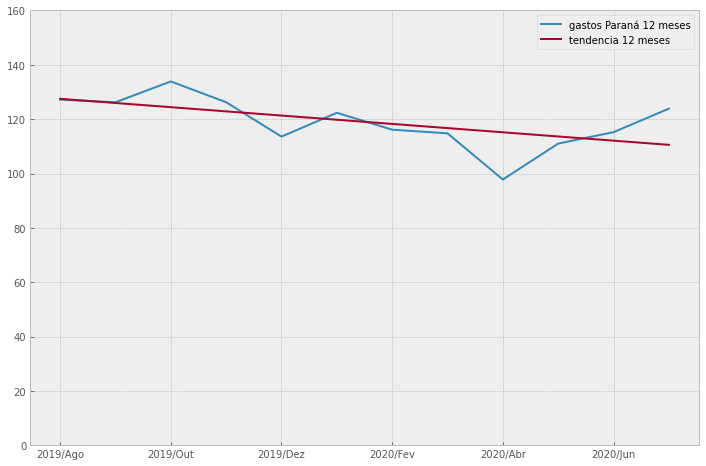

In [139]:
data12 = pd.DataFrame(index = parana.columns[-17:-5], data={'gastos Paraná 12 meses': ydat12, 'tendencia 12 meses': tend12})
data12.plot(figsize=(12,8)) # add kwargs for title and other layout/design aspects
plt.ylim(0, 160)
plt.show() # or plt.gcf().savefig(path)

***Veja ACIMA que a linha de Tendência nesse período ficou DECRESCENTE*** passando a informação oposto ao período total

##### Comparando os dois gráficos:

<AxesSubplot:>

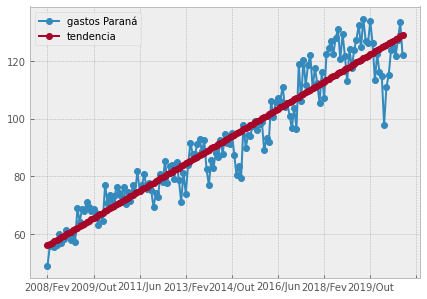

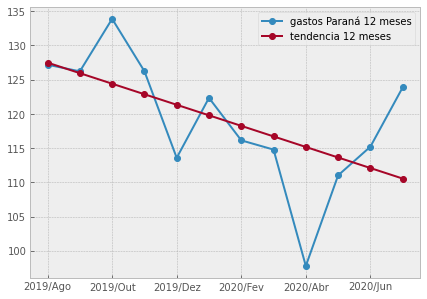

In [140]:
data.plot(figsize=(7,5), marker='o')
data12.plot(figsize=(7,5),marker='o')

Uma visão mais próxima e com gráfico menores, maximizando a DISTORÇÃO da percepção das linha de TENDENCIA divergentes e com eixo Y não equivalente, como exemplo de má prática ou indício de manipulação.

#### Desafio 02 - Aula4 : Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.
***
***

O tratamento e transformação de dados em informações – que consome boa parte do tempo de um projeto -, a visualização, interpretação, testes estatísticos, implementação e apresentação dos resultados são etapas geralmente cumpridas por um cientista de dados. Ainda segundo [Pollyana Gonçalves](https://medium.com/techbloghotmart/afinal-como-se-desenvolve-um-projeto-de-data-science-233472996c34) são várias etapas do ciclo de vida de um projeto de Ciència de Dados: 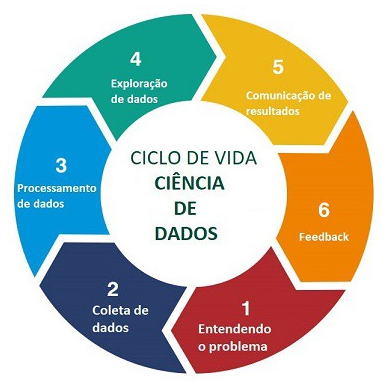 <br><br>

Em cada uma dessas etapas há possibilidades de má prática e mesmo manipulação. Na aula 4 (módulo1) vimos possibilidades de manipulação na transformação em informação e principalmente visualização de gráficos. Nesse interim, o site [Supurious Correlations](https://www.tylervigen.com/spurious-correlations) demonstra que transformar dados não relacionados em visualizações gráficas pode render enganos (que no caso são tão absurdos que apenas ilustram essa possibilidade).<br><br>

Por outro lado, considero a parte de testes ESTATÍSTICOS em má prática e manipulação, como uma das mais difícieis de detectar, podendo ocorrer por desconhecimento do cientista de dados de qual algorítmo ou técnica estatística é a mais adequada para cada tipo BASE DE DADOS ou simplesmente por manipulação intencional. No livro COMO MENTIR COM ESTATÍSTICA <br> 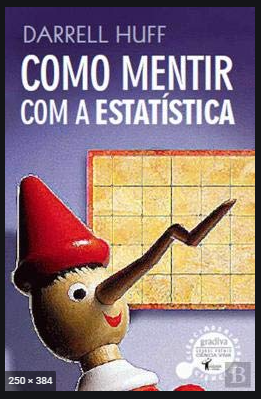<br>
O autor Darrel Huff fala em 157 páginas, por exemplo, que <i>"A linguagem secreta de estatísticas, tão atraente, é empregada para o sensacionalismo, para inflar,
confundir ou simplificar demais a realidade de um produto ou informação à sociedade"</i> e ainda que o livro é <i> "uma espécie de cartilha de como usar estatísticas
para enganar" </i> com a possibilidade de criar gráficos distorcidos e resultados tendenciosos, conseguindo assim provocar o senso crítoco necessário aos leitores.
***
***

### <b>Aula 5 - Mod.1 - Manipulação e interpretação de gráficos

#### Para avaliar gráficos, vamos selecionar o dataframe apenas para o mês mais recente

In [149]:
mes_mais_recente = ordenado_por_total.columns[-1]   # -1 pega o primeiro mes do final para o começo, ou seja o último no caso Março de 2021
mes_mais_recente

'2021/Mar'

#### Agora fazer um dataframe fixo para o gasto do mes mais recente

In [143]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           177.41
31 Minas Gerais         79.78
41 Paraná               43.48
43 Rio Grande do Sul    37.80
33 Rio de Janeiro       49.15
Name: 2021/Mar, dtype: float64

#### Gráfico padrão do pandas:

<AxesSubplot:xlabel='Unidade da Federação'>

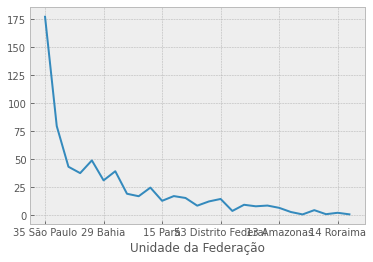

In [144]:
gastos_do_mais_recente.plot()

O gráfico de linhas não passa boa visualização e informação de difícil comparação entre estados

#### Tentando pelo gráfico de pizza (não recomendado):

<AxesSubplot:ylabel='2021/Mar'>

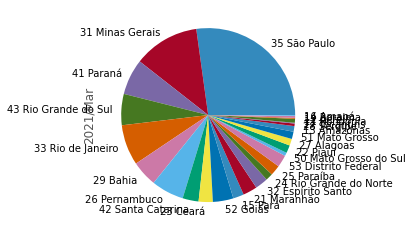

In [145]:
gastos_do_mais_recente.plot(kind='pie')

A visuzalização é pessima<br>
Horrores da pizza atual:

- legenda está horrível
- número de fatias inacreditável

Já estamos com uma vantagem:
- o gráfico ao menos veio ordenado (por conta do feito anteriormente com o dataframe)

#### Agora deixando desordenado aleatoriamente com sample(frac=1) para ver que ficaria pior ainda esse tipo de gráfico

<AxesSubplot:ylabel='2021/Mar'>

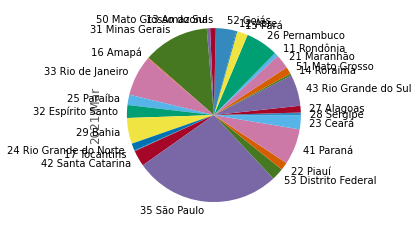

In [146]:
gastos_do_mais_recente.sample(frac=1).plot(kind='pie')

Horrores da pizza atual:

- legenda está horrível
- número de fatias inacreditável
- não dá para saber a ordem
- cores repetidas
- muito ruim para definir ordem
- péssimo para COMPARAR

#### Por vezes uma visualização simples pra valor absoluto (gastos em milhões) em forma de tabela explica melhor que o gráfico de pizza

In [147]:
gastos_do_mais_recente

Unidade da Federação
35 São Paulo             177.41
31 Minas Gerais           79.78
41 Paraná                 43.48
43 Rio Grande do Sul      37.80
33 Rio de Janeiro         49.15
29 Bahia                  31.31
26 Pernambuco             39.47
42 Santa Catarina         19.38
23 Ceará                  17.17
52 Goiás                  24.87
15 Pará                   13.07
21 Maranhão               17.29
32 Espírito Santo         15.61
24 Rio Grande do Norte     8.73
25 Paraíba                12.52
53 Distrito Federal       14.73
50 Mato Grosso do Sul      4.04
22 Piauí                   9.54
27 Alagoas                 8.18
51 Mato Grosso             8.84
13 Amazonas                6.80
28 Sergipe                 3.08
17 Tocantins               0.93
11 Rondônia                4.73
12 Acre                    1.14
14 Roraima                 2.38
16 Amapá                   0.99
Name: 2021/Mar, dtype: float64

#### Uma forma de usar tabela para comparar um Estado escolhido em relação aos outro pelo gasto (Rio de Janeiro)

In [148]:
gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]

Unidade da Federação
35 São Paulo             3.61
31 Minas Gerais          1.62
41 Paraná                0.88
43 Rio Grande do Sul     0.77
33 Rio de Janeiro        1.00
29 Bahia                 0.64
26 Pernambuco            0.80
42 Santa Catarina        0.39
23 Ceará                 0.35
52 Goiás                 0.51
15 Pará                  0.27
21 Maranhão              0.35
32 Espírito Santo        0.32
24 Rio Grande do Norte   0.18
25 Paraíba               0.25
53 Distrito Federal      0.30
50 Mato Grosso do Sul    0.08
22 Piauí                 0.19
27 Alagoas               0.17
51 Mato Grosso           0.18
13 Amazonas              0.14
28 Sergipe               0.06
17 Tocantins             0.02
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.05
16 Amapá                 0.02
Name: 2021/Mar, dtype: float64

Na tabela acima, cada Estado divide o seu gasto do mes de Março de 2021 com o gasto do mesmo mes do Rio de Janeiro. O do próprio RJ é 1 e os outros são informações de proporção em relação a ele. Ex. Parana gastou apenas 88% do que o RJ gastou

In [153]:
(gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]).head(5)   # Usar o parentesis antes do head pois o colchete do loc daria erro antes da função head

Unidade da Federação
35 São Paulo           3.61
31 Minas Gerais        1.62
41 Paraná              0.88
43 Rio Grande do Sul   0.77
33 Rio de Janeiro      1.00
Name: 2021/Mar, dtype: float64

Vejam que os valores aqui não estão mais ordenados porque pegam apenas o último mês e o ordenamento foi feito com o TOTAL da tabela

#### Visualização com gráfico de barra - também não está ordenado por representar apenas o mês de março/2021 e não o total.

<AxesSubplot:xlabel='Unidade da Federação'>

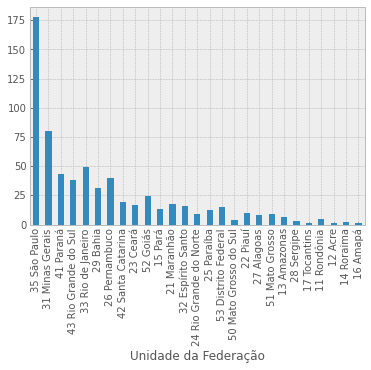

In [154]:
gastos_do_mais_recente.plot(kind='bar')

#### Ordenando os Estados apenas com o plot:

<AxesSubplot:xlabel='Unidade da Federação'>

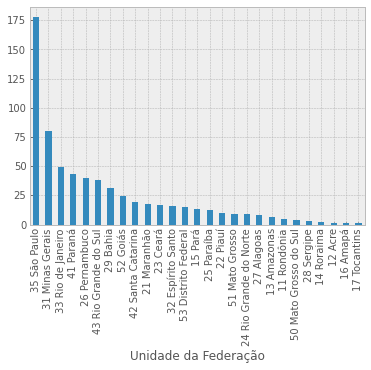

In [156]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)  # se usasse True ou mesmo nada o ordenamento seria ascendente do menor para o maior
gastos_do_mais_recente.plot(kind='bar')

***

### Desafios - AULA 5 - MOD.1

***
***

#### Desafio 01 - Aula 5: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

Uma das formas de colocar linhas de grid de forma automática é escolher um estilo. Abaixo está o 'seaborn' . Outros estilos existem conforme imagem abaixo do gráfico. Os gráficos anteriores acima aparecem em função do último estilo que escolhi antes, que foi o 'bmh'.

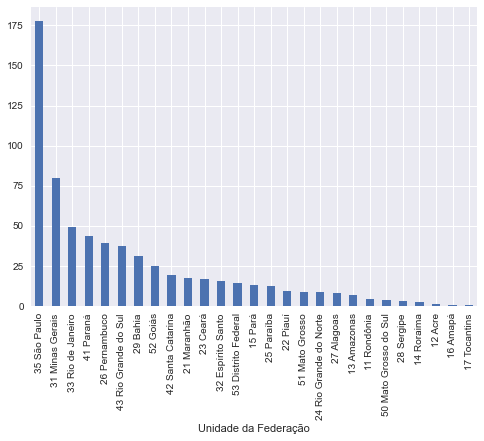

In [164]:
gastos_do_mais_recente.plot(kind='bar')
plt.style.use('seaborn') 

Estilos prédefinidos de gráfico:<br>
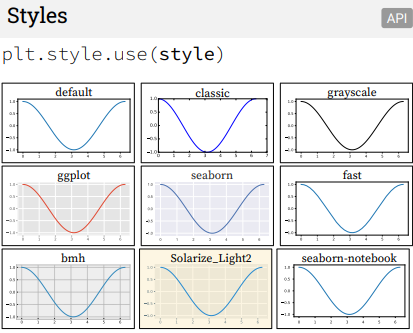

Para definir com acurácia cada parte do grid tem uma documentação em https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html onde:<br>
b: bool or None, optional
Whether to show the grid lines. If any kwargs are supplied, it is assumed you want the grid on and b will be set to True.<br>
If b is None and there are no kwargs, this toggles the visibility of the lines.

which{'major', 'minor', 'both'}, optional
The grid lines to apply the changes on.

axis{'both', 'x', 'y'}, optional
The axis to apply the changes on.

kwargsLine2D properties
Define the line properties of the grid, e.g.: grid(color='r', linestyle='-', linewidth=2)

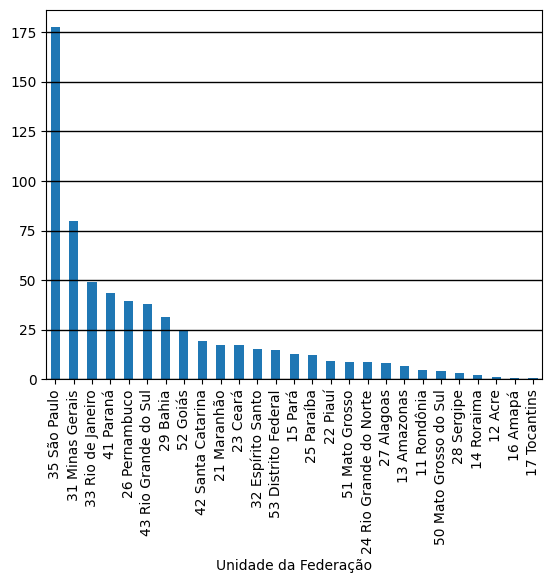

In [236]:
gastos_do_mais_recente.plot(kind='bar')
plt.grid(b=True, which='major', axis='y',color='k', linestyle='-', linewidth=1)

Guia de cores 'color':<br>
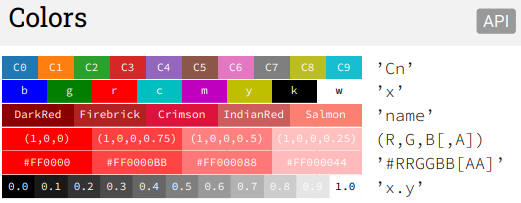

#### Desafio 02 - Aula 5: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

Tabela de gastos dos Estados em função da Bahia para o mes mais recente (mar/21):

In [239]:
gastos_do_mais_recente / gastos_do_mais_recente.loc['29 Bahia']

Unidade da Federação
35 São Paulo             5.67
31 Minas Gerais          2.55
33 Rio de Janeiro        1.57
41 Paraná                1.39
26 Pernambuco            1.26
43 Rio Grande do Sul     1.21
29 Bahia                 1.00
52 Goiás                 0.79
42 Santa Catarina        0.62
21 Maranhão              0.55
23 Ceará                 0.55
32 Espírito Santo        0.50
53 Distrito Federal      0.47
15 Pará                  0.42
25 Paraíba               0.40
22 Piauí                 0.30
51 Mato Grosso           0.28
24 Rio Grande do Norte   0.28
27 Alagoas               0.26
13 Amazonas              0.22
11 Rondônia              0.15
50 Mato Grosso do Sul    0.13
28 Sergipe               0.10
14 Roraima               0.08
12 Acre                  0.04
16 Amapá                 0.03
17 Tocantins             0.03
Name: 2021/Mar, dtype: float64

Gráfico de barra de gastos dos Estados em função da Bahia (destacando este Estado):

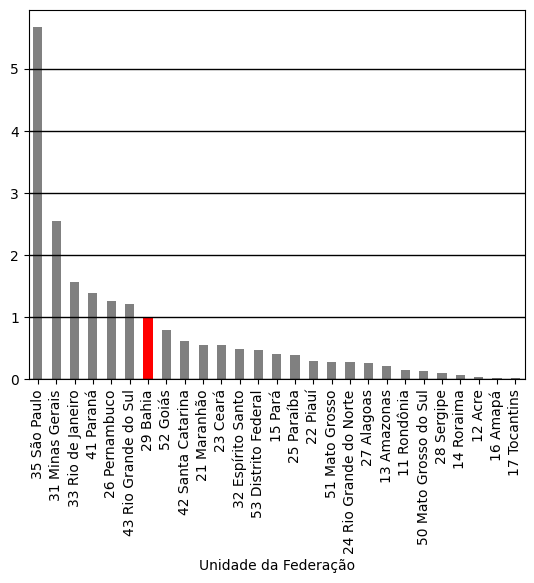

In [277]:
cores_estados = ["grey"] * 27
cores_estados[6] = "r"

(gastos_do_mais_recente / gastos_do_mais_recente.loc['29 Bahia']).plot(kind='bar', color=cores_estados)
plt.grid(b=True, which='major', axis='y',color='k', linestyle='-', linewidth=1)

#ax.bar('Unidades da fFederaddção', '29 Bahia', color = 'r', width = 0.25)
#plt.axvspan('29 Bahia', '29 Bahia', color='red', alpha=0.5)
#patches = plt.bar(align='left', color='g')
#patches['29 Bahia'].set_fc('r')

#### Desafio 03 - Aula 5 - Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha. (Gráfico e tabelas)

##### **Selecionando o dataframe BA/SP de 2011 a 2020:**

In [278]:
ordenado_por_total.index

Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro', '29 Bahia', '26 Pernambuco', '42 Santa Catarina',
       '23 Ceará', '52 Goiás', '15 Pará', '21 Maranhão', '32 Espírito Santo',
       '24 Rio Grande do Norte', '25 Paraíba', '53 Distrito Federal',
       '50 Mato Grosso do Sul', '22 Piauí', '27 Alagoas', '51 Mato Grosso',
       '13 Amazonas', '28 Sergipe', '17 Tocantins', '11 Rondônia', '12 Acre',
       '14 Roraima', '16 Amapá'],
      dtype='object', name='Unidade da Federação')

In [286]:
ordenado_por_total.head()

2008/Fev  2008/Mar  2008/Abr  2008/Mai  2008/Jun  \
Unidade da Federação                                                     
35 São Paulo            172.96    170.56    170.34    172.46    175.49   
31 Minas Gerais          70.30     79.12     79.05     79.27     79.62   
41 Paraná                48.86     55.61     56.12     55.57     56.09   
43 Rio Grande do Sul     45.90     52.93     51.97     51.68     53.76   
33 Rio de Janeiro        44.13     42.90     45.31     43.95     44.11   

                      2008/Jul  2008/Ago  2008/Set  2008/Out  2008/Nov  ...  \
Unidade da Federação                                                    ...   
35 São Paulo            179.57    180.01    180.15    191.86    190.93  ...   
31 Minas Gerais          82.21     80.37     82.41     88.61     84.49  ...   
41 Paraná                59.80     56.70     58.09     61.37     59.67  ...   
43 Rio Grande do Sul     56.39     56.23     57.91     59.59     57.57  ...   
33 Rio de Janeiro        44.36     42.50     43.07     44.55     41.35  ...   

                      2020/Jun  2020/Jul  2020/Ago  2020/Set  2020/Out  \
Unidade da Federação                                                     
35 São Paulo            328.29    361.99    350.27    338.87    328.06   
31 Minas Gerais         157.28    177.47    182.18    181.42    174.59   
41 Paraná               115.20    123.86    125.09    121.77    127.51   
43 Rio Grande do Sul     96.80    108.54    111.76    110.11    113.89   
33 Rio de Janeiro        88.14     95.94     89.80     81.89     80.57   

                      2020/Nov  2020/Dez  2021/Jan  2021/Fev  2021/Mar  
Unidade da Federação                                                    
35 São Paulo            324.60    326.85    324.12    268.19    177.41  
31 Minas Gerais         168.56    166.38    155.06    119.88     79.78  
41 Paraná               133.44    122.15    106.95     83.13     43.48  
43 Rio Grande do Sul    116.74    116.83    102.32     84.40     37.80  
33 Rio de Janeiro        82.81     90.57     87.20     60.87     49.15  

[5 rows x 158 columns]

##### **Determinando o intervalo da década de 2011 a 2020:**

In [288]:
ordenado_por_total.columns[35:-3]

Index(['2011/Jan', '2011/Fev', '2011/Mar', '2011/Abr', '2011/Mai', '2011/Jun',
       '2011/Jul', '2011/Ago', '2011/Set', '2011/Out',
       ...
       '2020/Mar', '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul', '2020/Ago',
       '2020/Set', '2020/Out', '2020/Nov', '2020/Dez'],
      dtype='object', length=120)

Gerando um dataframe de BA e SP da década de 2011 a 2020 com slice dos estados e colunas pretendidas:

In [315]:
gasto_BA_SP = ordenado_por_total[ordenado_por_total.columns[35:-3]].loc[['35 São Paulo', '29 Bahia']]
gasto_BA_SP

2011/Jan  2011/Fev  2011/Mar  2011/Abr  2011/Mai  \
Unidade da Federação                                                     
35 São Paulo            229.15    221.66    241.45    229.92    250.82   
29 Bahia                 53.68     50.68     54.92     54.32     56.09   

                      2011/Jun  2011/Jul  2011/Ago  2011/Set  2011/Out  ...  \
Unidade da Federação                                                    ...   
35 São Paulo            236.91    240.29    247.93    233.39    232.26  ...   
29 Bahia                 52.21     55.14     63.05     55.10     56.92  ...   

                      2020/Mar  2020/Abr  2020/Mai  2020/Jun  2020/Jul  \
Unidade da Federação                                                     
35 São Paulo            277.94    255.18    314.28    328.29    361.99   
29 Bahia                 71.00     60.14     66.38     78.68     91.01   

                      2020/Ago  2020/Set  2020/Out  2020/Nov  2020/Dez  
Unidade da Federação                                                    
35 São Paulo            350.27    338.87    328.06    324.60    326.85  
29 Bahia                 86.23     78.14     82.91     81.87     83.13  

[2 rows x 120 columns]

In [324]:
gasto_BA_SP.T

Unidade da Federação  35 São Paulo  29 Bahia
2011/Jan                    229.15     53.68
2011/Fev                    221.66     50.68
2011/Mar                    241.45     54.92
2011/Abr                    229.92     54.32
2011/Mai                    250.82     56.09
...                            ...       ...
2020/Ago                    350.27     86.23
2020/Set                    338.87     78.14
2020/Out                    328.06     82.91
2020/Nov                    324.60     81.87
2020/Dez                    326.85     83.13

[120 rows x 2 columns]

##### **Determinando a população dos Estados**<br>
Censo 2010: https://www.ibge.gov.br/estatisticas/sociais/populacao/9662-censo-demografico-2010.html?=&t=resultados Fonte: IBGE<br>
Estimativa 2020: https://www.ibge.gov.br/cidades-e-estados.html Fonte: IBGE

##### Adoto o critério de distribuir o crescimento da população em partes iguais ao longo de 120 meses do período 2011/20 e NORMALIZANDO POR MILHÃO (já que os gastos estão por milhão também):

In [331]:
pop_SP_2011 = float(41262199/1000000)
pop_SP_2020 = float(46289333/1000000)
pop_SP_dist = np.linspace(pop_SP_2011, pop_SP_2020, 120)
print(pop_SP_dist)

[41.262199   41.30444382 41.34668865 41.38893347 41.43117829 41.47342312
 41.51566794 41.55791276 41.60015759 41.64240241 41.68464724 41.72689206
 41.76913688 41.81138171 41.85362653 41.89587135 41.93811618 41.980361
 42.02260582 42.06485065 42.10709547 42.14934029 42.19158512 42.23382994
 42.27607476 42.31831959 42.36056441 42.40280924 42.44505406 42.48729888
 42.52954371 42.57178853 42.61403335 42.65627818 42.698523   42.74076782
 42.78301265 42.82525747 42.86750229 42.90974712 42.95199194 42.99423676
 43.03648159 43.07872641 43.12097124 43.16321606 43.20546088 43.24770571
 43.28995053 43.33219535 43.37444018 43.416685   43.45892982 43.50117465
 43.54341947 43.58566429 43.62790912 43.67015394 43.71239876 43.75464359
 43.79688841 43.83913324 43.88137806 43.92362288 43.96586771 44.00811253
 44.05035735 44.09260218 44.134847   44.17709182 44.21933665 44.26158147
 44.30382629 44.34607112 44.38831594 44.43056076 44.47280559 44.51505041
 44.55729524 44.59954006 44.64178488 44.68402971 44.7

In [330]:
pop_BA_2011 = float(14016906/1000000)
pop_BA_2020 = float(14930634/1000000)
pop_BA_dist = np.linspace(pop_BA_2011, pop_BA_2020, 120)
print(pop_BA_dist)

[14.016906   14.02458439 14.03226277 14.03994116 14.04761955 14.05529793
 14.06297632 14.07065471 14.07833309 14.08601148 14.09368987 14.10136825
 14.10904664 14.11672503 14.12440341 14.1320818  14.13976018 14.14743857
 14.15511696 14.16279534 14.17047373 14.17815212 14.1858305  14.19350889
 14.20118728 14.20886566 14.21654405 14.22422244 14.23190082 14.23957921
 14.2472576  14.25493598 14.26261437 14.27029276 14.27797114 14.28564953
 14.29332792 14.3010063  14.30868469 14.31636308 14.32404146 14.33171985
 14.33939824 14.34707662 14.35475501 14.36243339 14.37011178 14.37779017
 14.38546855 14.39314694 14.40082533 14.40850371 14.4161821  14.42386049
 14.43153887 14.43921726 14.44689565 14.45457403 14.46225242 14.46993081
 14.47760919 14.48528758 14.49296597 14.50064435 14.50832274 14.51600113
 14.52367951 14.5313579  14.53903629 14.54671467 14.55439306 14.56207145
 14.56974983 14.57742822 14.58510661 14.59278499 14.60046338 14.60814176
 14.61582015 14.62349854 14.63117692 14.63885531 14

##### **Acrescentando as linhas da POP BA e SP ao dataframe dos 2 Estados de 2011 a 2020**

In [332]:
gasto_BA_SP.loc['pop_SP'] = pop_SP_dist
gasto_BA_SP.loc['pop_BA'] = pop_BA_dist
gasto_BA_SP

2011/Jan  2011/Fev  2011/Mar  2011/Abr  2011/Mai  \
Unidade da Federação                                                     
35 São Paulo            229.15    221.66    241.45    229.92    250.82   
29 Bahia                 53.68     50.68     54.92     54.32     56.09   
pop_SP                   41.26     41.30     41.35     41.39     41.43   
pop_BA                   14.02     14.02     14.03     14.04     14.05   

                      2011/Jun  2011/Jul  2011/Ago  2011/Set  2011/Out  ...  \
Unidade da Federação                                                    ...   
35 São Paulo            236.91    240.29    247.93    233.39    232.26  ...   
29 Bahia                 52.21     55.14     63.05     55.10     56.92  ...   
pop_SP                   41.47     41.52     41.56     41.60     41.64  ...   
pop_BA                   14.06     14.06     14.07     14.08     14.09  ...   

                      2020/Mar  2020/Abr  2020/Mai  2020/Jun  2020/Jul  \
Unidade da Federação                                                     
35 São Paulo            277.94    255.18    314.28    328.29    361.99   
29 Bahia                 71.00     60.14     66.38     78.68     91.01   
pop_SP                   45.91     45.95     45.99     46.04     46.08   
pop_BA                   14.86     14.87     14.88     14.88     14.89   

                      2020/Ago  2020/Set  2020/Out  2020/Nov  2020/Dez  
Unidade da Federação                                                    
35 São Paulo            350.27    338.87    328.06    324.60    326.85  
29 Bahia                 86.23     78.14     82.91     81.87     83.13  
pop_SP                   46.12     46.16     46.20     46.25     46.29  
pop_BA                   14.90     14.91     14.92     14.92     14.93  

[4 rows x 120 columns]

##### **Estabelecendo a relação de gasto por habitante para os Estados e acrescentando ao DF**

In [343]:
gasto_BA_SP.loc['gasto_SP_hab'] = gasto_BA_SP.loc['35 São Paulo']/gasto_BA_SP.loc['pop_SP']
gasto_BA_SP.loc['gasto_BA_hab'] = gasto_BA_SP.loc['29 Bahia']/gasto_BA_SP.loc['pop_BA']
gasto_BA_SP

2011/Jan  2011/Fev  2011/Mar  2011/Abr  2011/Mai  \
Unidade da Federação                                                     
35 São Paulo            229.15    221.66    241.45    229.92    250.82   
29 Bahia                 53.68     50.68     54.92     54.32     56.09   
pop_SP                   41.26     41.30     41.35     41.39     41.43   
pop_BA                   14.02     14.02     14.03     14.04     14.05   
gasto_SP_hab              5.55      5.37      5.84      5.56      6.05   
gasto_BA_hab              3.83      3.61      3.91      3.87      3.99   

                      2011/Jun  2011/Jul  2011/Ago  2011/Set  2011/Out  ...  \
Unidade da Federação                                                    ...   
35 São Paulo            236.91    240.29    247.93    233.39    232.26  ...   
29 Bahia                 52.21     55.14     63.05     55.10     56.92  ...   
pop_SP                   41.47     41.52     41.56     41.60     41.64  ...   
pop_BA                   14.06     14.06     14.07     14.08     14.09  ...   
gasto_SP_hab              5.71      5.79      5.97      5.61      5.58  ...   
gasto_BA_hab              3.71      3.92      4.48      3.91      4.04  ...   

                      2020/Mar  2020/Abr  2020/Mai  2020/Jun  2020/Jul  \
Unidade da Federação                                                     
35 São Paulo            277.94    255.18    314.28    328.29    361.99   
29 Bahia                 71.00     60.14     66.38     78.68     91.01   
pop_SP                   45.91     45.95     45.99     46.04     46.08   
pop_BA                   14.86     14.87     14.88     14.88     14.89   
gasto_SP_hab              6.05      5.55      6.83      7.13      7.86   
gasto_BA_hab              4.78      4.04      4.46      5.29      6.11   

                      2020/Ago  2020/Set  2020/Out  2020/Nov  2020/Dez  
Unidade da Federação                                                    
35 São Paulo            350.27    338.87    328.06    324.60    326.85  
29 Bahia                 86.23     78.14     82.91     81.87     83.13  
pop_SP                   46.12     46.16     46.20     46.25     46.29  
pop_BA                   14.90     14.91     14.92     14.92     14.93  
gasto_SP_hab              7.59      7.34      7.10      7.02      7.06  
gasto_BA_hab              5.79      5.24      5.56      5.49      5.57  

[6 rows x 120 columns]

##### **Plotando um gráfico de linha:**

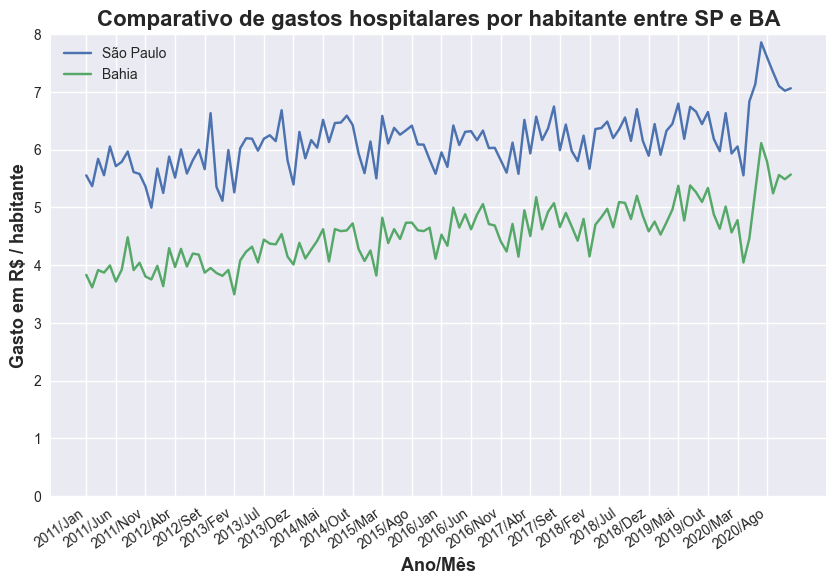

In [379]:
ax = gasto_BA_SP.loc[['gasto_SP_hab', 'gasto_BA_hab']].T.plot(figsize=(10,6))
ax.set_xlabel('Ano/Mês', fontsize=13, weight=(700))
ax.set_ylabel('Gasto em R$ / habitante', fontsize=13, weight=(700))
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.style.use('seaborn') 
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
ticks, labels = choose_number_of_str_ticks(24, df=gasto_BA_SP.loc[['gasto_SP_hab', 'gasto_BA_hab']].T, axis='x')
plt.legend(['São Paulo', 'Bahia'])
plt.ylim(0, 8)
plt.title('Comparativo de gastos hospitalares por habitante entre SP e BA', weight=(700), fontsize=16)
plt.show()

##### Tabela Comparativa Média entre SP e BA

In [396]:
gasto_BA_SP.loc[['gasto_SP_hab', 'gasto_BA_hab']]

2011/Jan  2011/Fev  2011/Mar  2011/Abr  2011/Mai  \
Unidade da Federação                                                     
gasto_SP_hab              5.55      5.37      5.84      5.56      6.05   
gasto_BA_hab              3.83      3.61      3.91      3.87      3.99   

                      2011/Jun  2011/Jul  2011/Ago  2011/Set  2011/Out  ...  \
Unidade da Federação                                                    ...   
gasto_SP_hab              5.71      5.79      5.97      5.61      5.58  ...   
gasto_BA_hab              3.71      3.92      4.48      3.91      4.04  ...   

                      2020/Mar  2020/Abr  2020/Mai  2020/Jun  2020/Jul  \
Unidade da Federação                                                     
gasto_SP_hab              6.05      5.55      6.83      7.13      7.86   
gasto_BA_hab              4.78      4.04      4.46      5.29      6.11   

                      2020/Ago  2020/Set  2020/Out  2020/Nov  2020/Dez  
Unidade da Federação                                                    
gasto_SP_hab              7.59      7.34      7.10      7.02      7.06  
gasto_BA_hab              5.79      5.24      5.56      5.49      5.57  

[2 rows x 120 columns]

##### % que SP gasta mais que a BA por habitante em média: **35,6%**

In [381]:
gasto_BA_SP.loc[['gasto_SP_hab', 'gasto_BA_hab']].T.mean()

Unidade da Federação
gasto_SP_hab   6.14
gasto_BA_hab   4.53
dtype: float64

In [387]:
((gasto_BA_SP.loc['gasto_SP_hab'].T.mean() / gasto_BA_SP.loc['gasto_BA_hab'].T.mean())-1)*100

35.57075016803235

##### Gráfico do % que SP gasta mais que a BA por habitante no período 2011/2020:

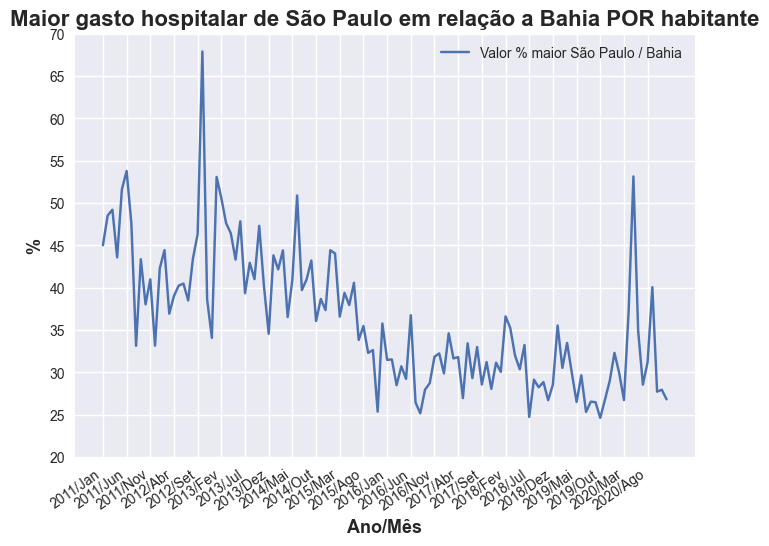

In [409]:
ax = (((gasto_BA_SP.loc['gasto_SP_hab'].T / gasto_BA_SP.loc['gasto_BA_hab'].T)-1)*100).plot()
ax.set_xlabel('Ano/Mês', fontsize=13, weight=(700))
ax.set_ylabel('%', fontsize=13, weight=(700))
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.style.use('seaborn') 
plt.xticks(rotation=35, ha='right')
plt.locator_params(axis='y', nbins=12)
ticks, labels = choose_number_of_str_ticks(24, df=(((gasto_BA_SP.loc['gasto_SP_hab'].T / gasto_BA_SP.loc['gasto_BA_hab'].T)-1)*100), axis='x')
plt.legend(['Valor % maior São Paulo / Bahia'])
plt.ylim(20, 70)
plt.title('Maior gasto hospitalar de São Paulo em relação a Bahia POR habitante', weight=(700), fontsize=16)
plt.show()


#### Desafio 04 - Aula 5: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

**ANÁLISE:**<br>
1) A Bahia é o 4.º estado em população mas apenas o 6º em gasto total em todo o período e o 7º no mês mais recente.<br>
2) A diferença média de gastos por população de São Paulo para a Bahia é de 35,6% a mais para São Paulo e se mantem em todo o período.
3) No gráfico comparativo da diferença % de gastos a diferença visula indica dois momentos> de jan/2011 até jun/2015 com valor maior de SP em torno de 42% e o segundo momento de jul/2015 em diante com a diferença caindo para cerca de 30%.<br>
**HIPÓTESES:**<BR>
1) Para tentar achar um motivo da diferença em SP e BA deve-se levantar dados que possam explorar as possibilidades de: 
    - Maior oferta de serviços hospitalatres de SP em relação a BA
    - Maior facilidade de acesso da população de SP a serviços de saúde e o consequente uso maior
    - Desconcentração e melhor distribuição espacial dos equipamentos de saúde em SP
    - Maior quantidade e equipamentos mais modernos disponíveis por atendimento SP, com consequente maior valor de custo por atendimento em SP
    - Explorar possibilidades de estruturas de saúde na Bahia ter maior parte em ambulatórios ou atendimento básico, com consequente menor custo por atendimento
    - Explorar possibilidade de maior estrutura de internação em SP e conjunto maior de equipamentos mais avançados poderem aumentar sobrevida em caso de internação com consequente maior custo

#### Desafio 05 - Aula 5: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

As **hipóteses** foram em geral exploradas nas vídeo-aulas ou ainda colocadas no desafio 4 acima. Fica porém, como oportunidade o estudo de dados históricos de implementação de políticas públicas que investem em infraestrutura, desconcentração e qualificação de atendimento de saúe em dois momentosde 2011 até meados de 20015 e de meados de 2015 em diante, pois houve mudança de patamar, indicando uma aparente maior e melhor ofertas de serviços de saúde na Bahia no segundo momento.
** Reflexão:**
    - Há necessidade de delimitação adequada de projetos de *DataScience* pois sempre nas análises exploratórias as constatações acabam levantando sempre novas questões a ser exploradas. Caso não haja delimitação o projeto pode não ter final previsto.
    - Invariavelmente a investigação por novas respostas requer novas bases de dados, muitas vezes com necessária pesquisa histórica, e de difícil busca, para viabilizar a exploração das hipóteses levantadas. 
    - Fica claro que o Brasil deve investir em cultura de dados em todos os níveis e setores, para poder ter novas e melhores base de dados bem estruturadas, ou mesmo não estruturadas, porém disponíveis e criteriosas, para alavancar a viabilidade de análises para implementação de melhores políticas públicas.
    - O atraso do censo do 2020 do IBGE traz por exemplo prejuídos a acuracidade de análise tendenciais que levem em conta a estrutura populacional, geográfica e de serviços no país


#### Super Desafio - Módulo 1: Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.

- As possibilidades a explorar podem ser:
    - Tempo de internação na Bahia, se aumentou ou caiu refletindo possível maior custo hospitalar no perído de 2015 em diante
    - Tendencia de aumento de óbitos por local de ocorrência x local de moradia para explorar possibilidades de maior deslocamento de pessoas dos município do interior do Estado para os da capital e região metropolitana ao longo dos momentos de todo o período e do período de covid
    
- Essa possível análise ficará para projeto pós bootcamp